# **Predict Student Performance from Game Play**

### Ho Chi Minh City University of Science

#### 21KHDL - Intelligent Data Analysis

#### Lecturers:
- Mr. Nguyễn Tiến Huy
- Mr. Nguyễn Trần Duy Minh
- Mr. Lê Thanh Tùng

#### Student:
- 21127038 - Võ Phú Hãn

<h1 style="text-align: center;"> Student Performance from Game Play - Exploratory Data Analysis</h1>

# Table of Contents
* [1. Data basic overview](#data-basic-overview)
    * [Train and test data](#data-basic-overview-train-test)
    * [Labels data](#data-basic-overview-labels)
* [2. Exploring data](#exploring-data)
    * [2.1 session_id](#session_id)
    * [2.2 index](#index)
    * [2.3 elapsed_time](#elapsed-time)
    * [2.4 event properties: name, type, and id](#event-properties)
    * [2.5. game room](#game-room)
    * [2.6 level and level_group](#level)
    * [2.7 click geo-location](#click-geo-location)
    * [2.8 text](#text)
    * [2.9 page](#page)
    * [2.10 hover](#hover)
    * [2.11 game properties: fullscreen, hq, and music](#game-properties)
* [3. References](#reference)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from wordcloud import WordCloud
import warnings
import gc

# settings
sns.set(style="whitegrid", color_codes=True)
warnings.filterwarnings("ignore")

# 1. Data basic overview <a class="anchor" id="data-basic-overview"></a>

The goal of the competition is to predict the performance of game-based learning from game logs. The data include: 
- training set with game sessions data (`train.csv`);
- correct answers for all questions for each session (`train_labels.csv`);
- test set with game sessions data (`test.csv`);
- sample submission file (`sample_submission.csv`).

Load data from `csv` files and store in pandas dataframes. If we use the default pandas scheme, the memory for storing the dataframe would be enormous. Configure the scheme as below to load data into memory with smaller footprint.

In [2]:
dtypes = {'session_id': 'category',
          'elapsed_time': np.int32,
          'event_name': 'category',
          'name': 'category',
          'level': np.uint8,
          'page': 'category',
          'room_coor_x': np.float32,
          'room_coor_y': np.float32,
          'screen_coor_x': np.float32,
          'screen_coor_y': np.float32,
          'hover_duration': np.float32,
          'text': 'category',
          'fqid': 'category',
          'room_fqid': 'category',
          'text_fqid': 'category',
          'fullscreen': np.int8,
          'hq': np.int8,
          'music': np.int8,
          'level_group': 'category'}

train = pd.read_csv('/kaggle/input/predict-student-performance-from-game-play/train.csv', dtype=dtypes)
test = pd.read_csv('/kaggle/input/predict-student-performance-from-game-play/test.csv', dtype=dtypes)
labels = pd.read_csv('/kaggle/input/predict-student-performance-from-game-play/train_labels.csv')

print('Train data shape:', train.shape)
print('Test data shape:', test.shape)
print('Labels data shape:', labels.shape)

Train data shape: (26296946, 20)
Test data shape: (3728, 21)
Labels data shape: (424116, 2)


### Train and test data <a class="anchor" id="data-basic-overview-train-test"></a>

In [3]:
print("Sample of train data:")
train.head()

Sample of train data:


session_id  index  elapsed_time      event_name   name  level page  \
0  20090312431273200      0             0  cutscene_click  basic      0  NaN   
1  20090312431273200      1          1323    person_click  basic      0  NaN   
2  20090312431273200      2           831    person_click  basic      0  NaN   
3  20090312431273200      3          1147    person_click  basic      0  NaN   
4  20090312431273200      4          1863    person_click  basic      0  NaN   

   room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  hover_duration  \
0  -413.991394  -159.314682          380.0          494.0             NaN   
1  -413.991394  -159.314682          380.0          494.0             NaN   
2  -413.991394  -159.314682          380.0          494.0             NaN   
3  -413.991394  -159.314682          380.0          494.0             NaN   
4  -412.991394  -159.314682          381.0          494.0             NaN   

                            text    fqid                       room_fqid  \
0                      undefined   intro  tunic.historicalsociety.closet   
1  Whatcha doing over there, Jo?  gramps  tunic.historicalsociety.closet   
2         Just talking to Teddy.  gramps  tunic.historicalsociety.closet   
3     I gotta run to my meeting!  gramps  tunic.historicalsociety.closet   
4            Can I come, Gramps?  gramps  tunic.historicalsociety.closet   

                                           text_fqid  fullscreen  hq  music  \
0               tunic.historicalsociety.closet.intro           0   0      1   
1  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   
2  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   
3  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   
4  tunic.historicalsociety.closet.gramps.intro_0_...           0   0      1   

  level_group  
0         0-4  
1         0-4  
2         0-4  
3         0-4  
4         0-4

In [4]:
print("Sample of test data:")
test.head()

Sample of test data:


session_id  index  elapsed_time      event_name   name  level page  \
0  20090109393214576      0             0  cutscene_click  basic      0  NaN   
1  20090109393214576      1          1965    person_click  basic      0  NaN   
2  20090109393214576      2          3614    person_click  basic      0  NaN   
3  20090109393214576      3          5330    person_click  basic      0  NaN   
4  20090109393214576      4          6397    person_click  basic      0  NaN   

   room_coor_x  room_coor_y  screen_coor_x  ...  hover_duration  \
0  -413.991394    75.685310          380.0  ...             NaN   
1  -105.991402   -63.314686          688.0  ...             NaN   
2  -418.991394    47.685314          375.0  ...             NaN   
3  -110.991402   -57.314686          683.0  ...             NaN   
4  -110.991402   -57.314686          683.0  ...             NaN   

                            text    fqid                       room_fqid  \
0                      undefined   intro  tunic.historicalsociety.closet   
1  Whatcha doing over there, Jo?  gramps  tunic.historicalsociety.closet   
2         Just talking to Teddy.  gramps  tunic.historicalsociety.closet   
3     I gotta run to my meeting!  gramps  tunic.historicalsociety.closet   
4            Can I come, Gramps?  gramps  tunic.historicalsociety.closet   

                                           text_fqid fullscreen  hq  music  \
0               tunic.historicalsociety.closet.intro          0   0      1   
1  tunic.historicalsociety.closet.gramps.intro_0_...          0   0      1   
2  tunic.historicalsociety.closet.gramps.intro_0_...          0   0      1   
3  tunic.historicalsociety.closet.gramps.intro_0_...          0   0      1   
4  tunic.historicalsociety.closet.gramps.intro_0_...          0   0      1   

   level_group session_level  
0          0-4             0  
1          0-4             0  
2          0-4             0  
3          0-4             0  
4          0-4             0  

[5 rows x 21 columns]

**Comments:**
* `train` is quite a big dataframe (the train.csv file is ~5GB large).
* `test` has an extra columns called `session_level` which will be used to create the submission file.

In [5]:
print("Train data statistics:")
train.describe().apply(lambda x: x.apply('{0:.1f}'.format))

Train data statistics:


index  elapsed_time       level room_coor_x room_coor_y  \
count  26296946.0    26296946.0  26296946.0  24223674.0  24223674.0   
mean        644.5     4016693.9        12.2       -54.9      -116.2   
std         545.8    31270320.4         6.5       520.3       218.5   
min           0.0           0.0         0.0     -1992.4      -918.2   
25%         288.0      439700.0         6.0      -352.8      -212.7   
50%         595.0     1014801.0        13.0       -11.2       -97.6   
75%         896.0     1747040.0        18.0       296.7        22.7   
max       20473.0  1988606704.0        22.0      1261.8       543.6   

      screen_coor_x screen_coor_y hover_duration  fullscreen          hq  \
count    24223674.0    24223674.0      2002244.0  26296946.0  26296946.0   
mean          458.4         385.6         3471.0         0.1         0.1   
std           247.9         129.8       460202.4         0.3         0.3   
min             0.0           0.0            0.0         0.0         0.0   
25%           269.0         304.0           99.0         0.0         0.0   
50%           447.0         397.0          419.0         0.0         0.0   
75%           663.0         471.0         1266.0         0.0         0.0   
max          1919.0        1440.0    245163696.0         1.0         1.0   

            music  
count  26296946.0  
mean          0.9  
std           0.3  
min           0.0  
25%           1.0  
50%           1.0  
75%           1.0  
max           1.0

In [6]:
print("Test data statistics:")
test.describe().apply(lambda x: x.apply('{0:.1f}'.format))

Test data statistics:


index elapsed_time   level room_coor_x room_coor_y screen_coor_x  \
count  3728.0       3728.0  3728.0      3366.0      3366.0        3366.0   
mean    670.4    2065026.1    12.2       -14.7      -131.1         463.7   
std     411.2    2079750.0     6.3       511.1       224.0         243.7   
min       0.0          0.0     0.0     -1913.1      -908.3           0.0   
25%     320.0     570875.0     7.0      -290.1      -232.8         278.2   
50%     642.0    1174912.0    11.0        16.8      -109.0         460.0   
75%     983.2    2481633.8    18.0       355.1         1.0         680.0   
max    1563.0    6524025.0    22.0      1214.9       489.5         879.0   

      screen_coor_y hover_duration fullscreen      hq   music session_level  
count        3366.0          353.0     3728.0  3728.0  3728.0        3728.0  
mean          394.4         1415.6        0.0     0.0     1.0           4.1  
std           133.5         2664.6        0.0     0.0     0.0           2.4  
min            10.0           15.0        0.0     0.0     1.0           0.0  
25%           320.2           83.0        0.0     0.0     1.0           2.0  
50%           408.0          416.0        0.0     0.0     1.0           4.0  
75%           486.0         1316.0        0.0     0.0     1.0           6.0  
max           658.0        23451.0        0.0     0.0     1.0           8.0

**Comments:**
In both train and test data statistic, I notice there are many columns with missing values when comparing the number of values in each column. Let's analyse for more details.

Unique values in `train` and `test`:

In [7]:
stat = pd.DataFrame([train.nunique(), test.nunique()]).T.fillna(0)
stat.columns = ['Number of unique values in train', 'Number of unique values in test']
stat.head(30).style.format("{:,.0f}").background_gradient(cmap='YlGn')

Missing ratios in `train` and `test`

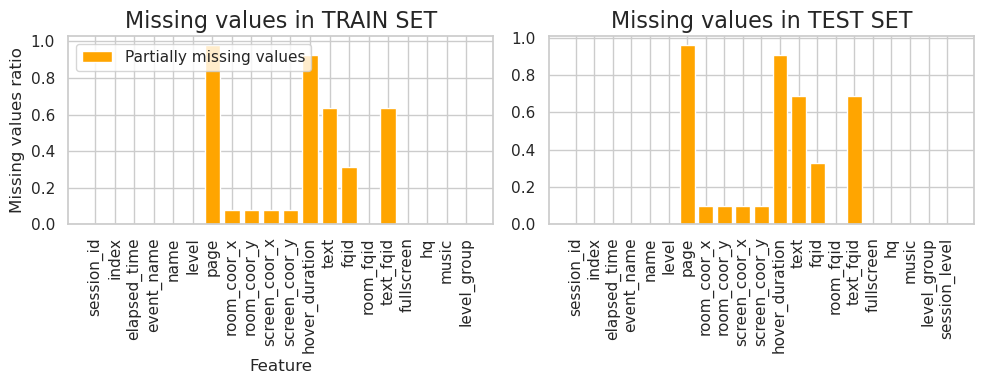

In [8]:
# Calculate the ratio of missing values for each column
train_missing_ratios = train.isna().sum() / len(train)
test_missing_ratios = test.isna().sum() / len(test)

# Visualize
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(train_missing_ratios.index,
        train_missing_ratios.values,
        color=['red' if ratio == 1 else 'orange' for ratio in train_missing_ratios.values])
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Missing values ratio', fontsize=12)
plt.title('Missing values in TRAIN SET', fontsize=16)
plt.xticks(rotation=90)
plt.legend(labels=['Partially missing values', 'Completely missing values'], loc='upper left')

plt.subplot(1, 2, 2)
plt.bar(test_missing_ratios.index,
        test_missing_ratios.values,
        color=['red' if ratio == 1 else 'orange' for ratio in test_missing_ratios.values])
plt.title('Missing values in TEST SET', fontsize=16)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Comments:**
- There are a lot of missing values in some columns. Howerver, the train and test dataframes have similar ratios of missing values which are good news.
- We may drop the ones with more than 80% of missing values. To make this decision about keeping or not the columns with high missing ratio, we will have to evaluate the relevance of them.
- Some columns are missing in all data (`session_level` in test). So its safe to drop them from the dataset:

In [9]:
gc.collect()

9976

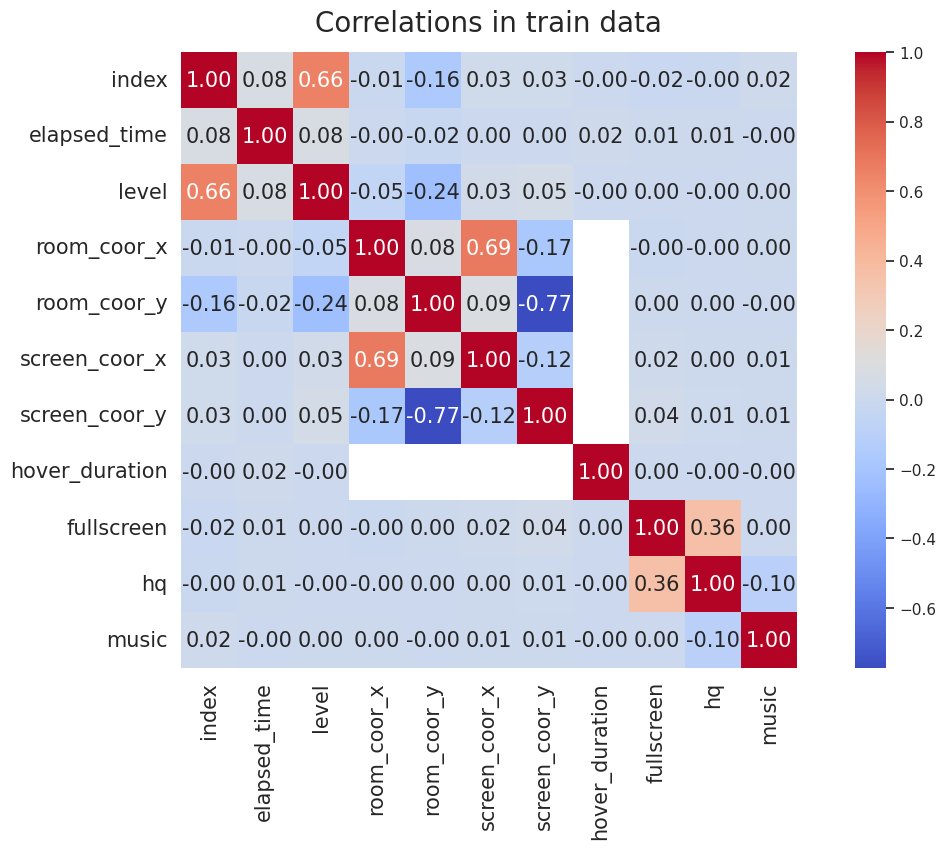

In [10]:
plt.figure(figsize=(15, 8))
g = sns.heatmap(train.corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 15},fmt='.2f')
g.tick_params(axis='x', labelsize=15)
g.tick_params(axis='y', labelsize=15)
g.set_title('Correlations in train data', size=20, pad=15)
plt.show()

**Comments:**
- The coordinate features has some correlations, that's because `screen_coor` is a part of `room_coor`.
- `level` and `index` also have correlation, the reason could be that the higher level, the more events a user need to arise. I will discuss more in following parts.

### Labels data <a class="anchor" id="data-basic-overview-labels"></a>

`train_labels.csv` includes two values:
- `session_id`: does not equal to session_id from the training set, this is combination `<session_id>_<question #>`;
- `correct`: flag for correct (1) or incorrect (0) answer.

Note that during gameplay the player must eventually select the correct answer to continue. A "correct answer" here indicates that the player got the answer correct on their first attempt. For the list of quizzes see [Game Walkthrough](https://www.kaggle.com/competitions/predict-student-performance-from-game-play/discussion/384796) by [@pjmathematician](https://www.kaggle.com/pjmathematician). 

In [11]:
print("Sample of labels data:")
labels.head()

Sample of labels data:


session_id  correct
0  20090312431273200_q1        1
1  20090312433251036_q1        0
2  20090312455206810_q1        1
3  20090313091715820_q1        0
4  20090313571836404_q1        1

In [12]:
labels.describe().T

count      mean       std  min  25%  50%  75%  max
correct  424116.0  0.705635  0.455757  0.0  0.0  1.0  1.0  1.0

**Comments:** About 70% of the answers are correct, so the dataset is slightly imbalanced.

I'll split the default `session_id` in labels data into `session_id_id` and `question_number`. Then visual the percentage of correct answers in each question.

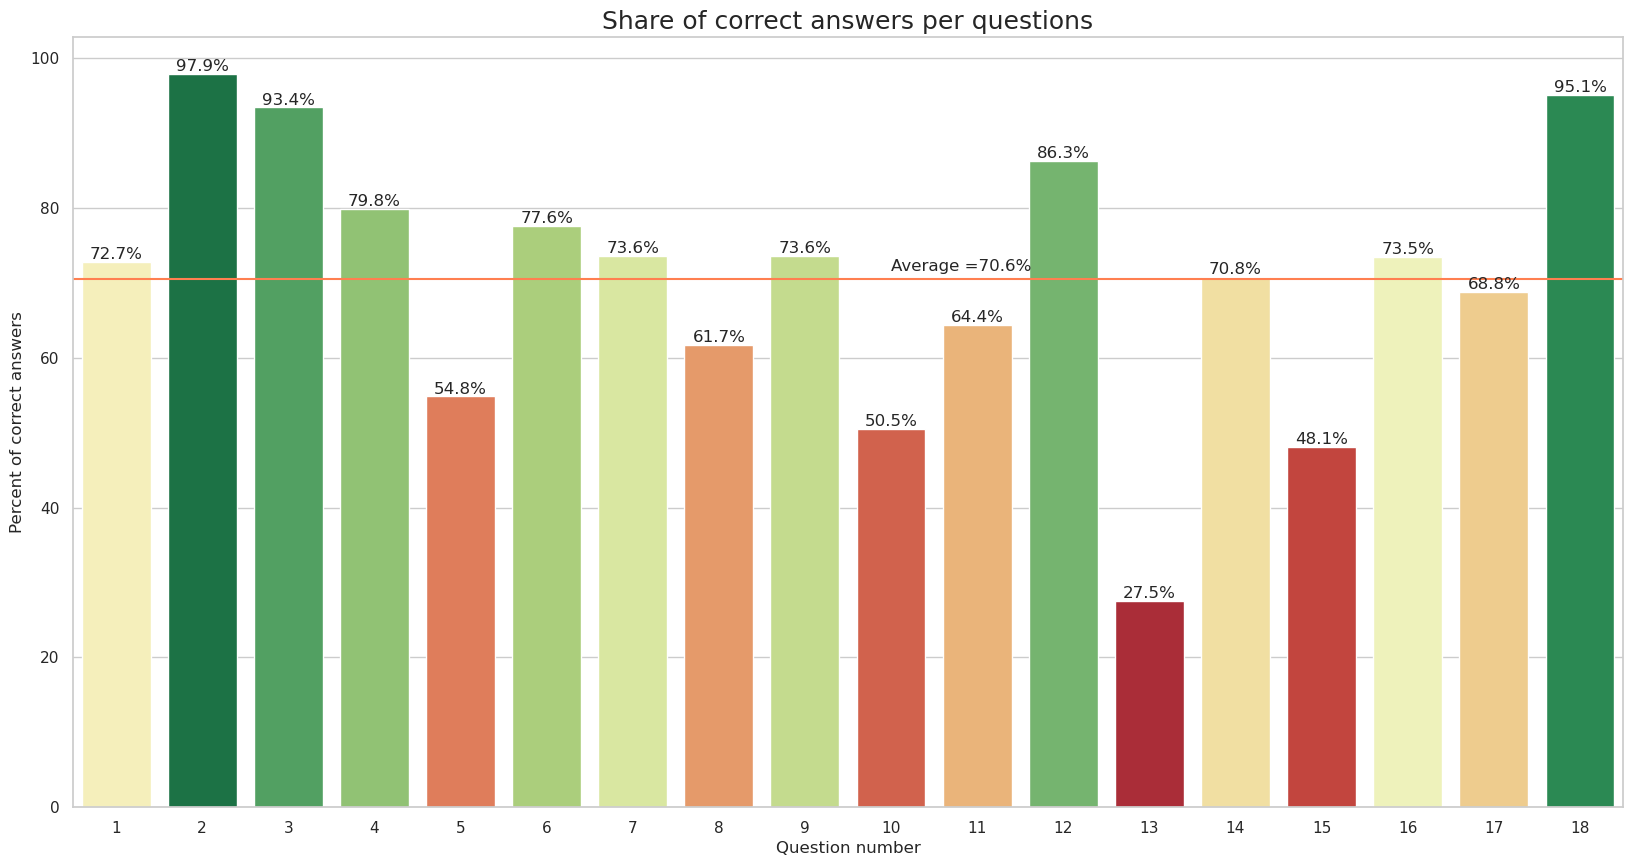

In [13]:
# Split session_id question into 'session_id_id', 'question_number'
labels[['session_id_id', 'question_number']] = labels['session_id'].str.split('_', 1, expand=True)
labels['session_id_id'] = labels['session_id_id'].astype(np.int64)

# Calculate average percentage of correct answers in all data
mean_correct = (labels['correct'].mean()*100).astype(np.float64)

# Calculate percentage of correct answers for each quetion
labels_perc = labels.groupby('question_number')['correct'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
labels_perc['number'] = labels_perc['question_number'].apply(lambda x: int(x[1:])).astype(np.int64)
labels_perc = labels_perc[labels_perc['correct'] == 1]

# Visualize
pal = sns.color_palette("RdYlGn", len(labels_perc))
rank = labels_perc.sort_values('number')['Percent'].argsort().argsort()
plt.figure(figsize=(20, 10))
g = sns.barplot(data=labels_perc, x='number', y="Percent", palette=np.array(pal[::])[rank])
g.axhline(mean_correct, color="coral")
plt.text(9, mean_correct+1, f'Average ={round(mean_correct, 1)}%')
g.axes.set_title("Share of correct answers per questions", fontsize=18)
g.set(xlabel='Question number', ylabel='Percent of correct answers')
g.bar_label(g.containers[0], fmt="%.1f%%")
del g, labels_perc, pal, rank, mean_correct

**Comments:**
- Q2 and Q18 have over 95% of their total answers correct. Therefore, during model training, we can skip these two and always set their `correct` flag true.
- Q13 has the lowest percentage of correct answers at 27.5%.
- After training and testing, we can revisit this chart for comparison.

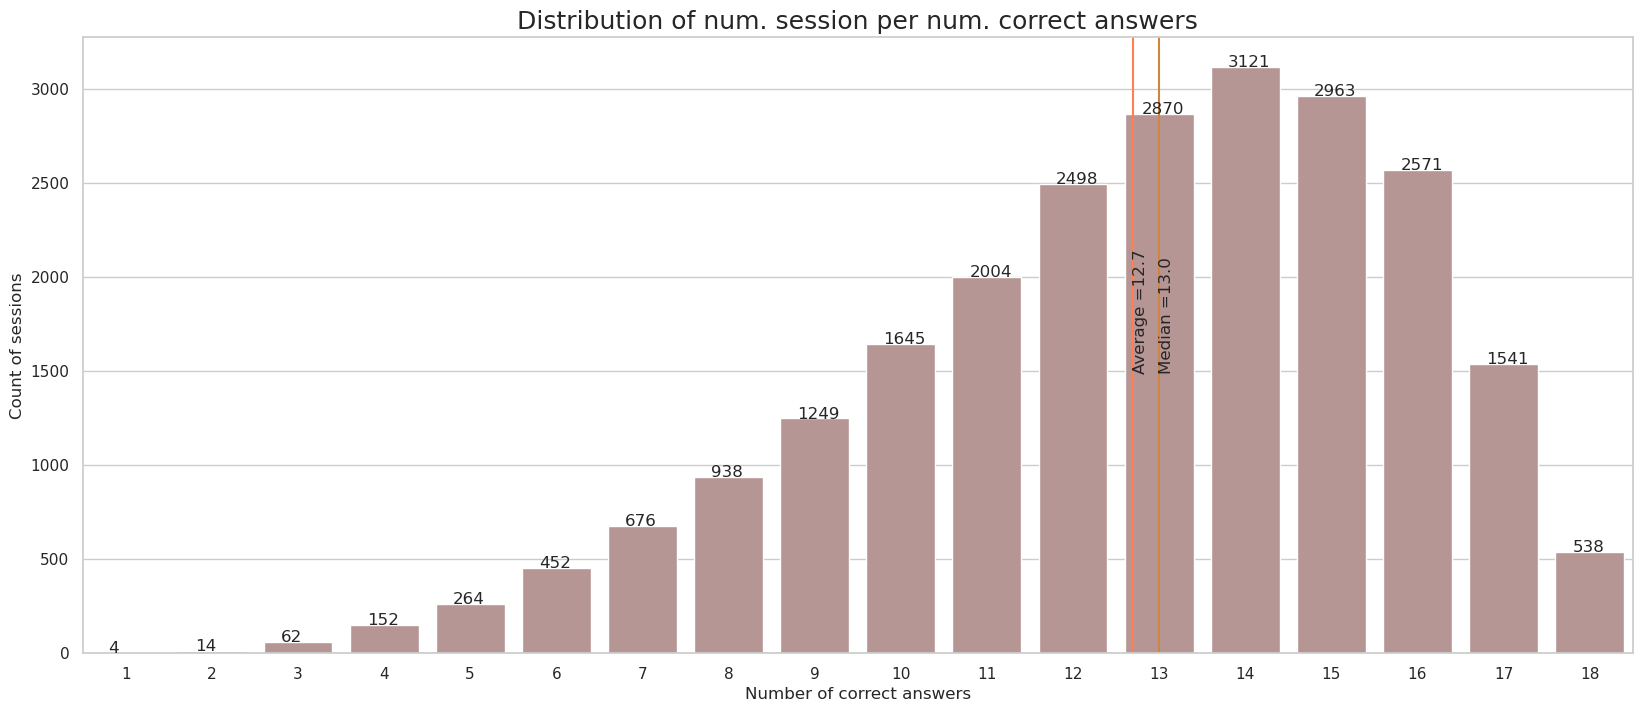

In [14]:
# Calculate the total number of correct answers per session by summing the 'correct' column grouped by 'session_id_id'
correct_answers_per_session = labels.groupby('session_id_id')['correct'].sum()

# Calculate the mean and median of the total correct answers per session
mean_correct_answers_per_session = correct_answers_per_session.mean()
median_correct_answers_per_session = correct_answers_per_session.median()

# Count the frequency of sessions for each number of correct answers
correct_answers_per_session = correct_answers_per_session.value_counts()

# Visualize
plt.figure(figsize=(20, 8))
g = sns.barplot(x=correct_answers_per_session.index, y=correct_answers_per_session.values, color='rosybrown')
plt.title('Distribution of num. session per num. correct answers', fontsize=18)
g.set_xticklabels(['{}'.format(int(num + 1)) for num in g.get_xticks()])
g.set(xlabel='Number of correct answers', ylabel='Count of sessions')
g.axvline(x=mean_correct_answers_per_session-1, color="coral")  # Line for mean
g.text(mean_correct_answers_per_session-1, 1500, f'Average ={round(mean_correct_answers_per_session, 1)}', rotation=90)
g.axvline(x=median_correct_answers_per_session-1, color="peru")  # Line for median
g.text(median_correct_answers_per_session-1, 1500, f'Median ={round(median_correct_answers_per_session, 1)}', rotation=90)
for i, v in enumerate(correct_answers_per_session.sort_index().values):
    plt.text(i-0.2, v, str(int(v)))
del correct_answers_per_session, mean_correct_answers_per_session, median_correct_answers_per_session, i, v

plt.show()


**Comments:**
- Every sessions has finished all 18 questions.
- No session cannot make any correct answer (at the first attempt). And a max number of correct answers a session can make is the max number of questions (18 questions).
- 50% in total sessions achieve at least 13 correct answers at their first attempt.

In [15]:
del labels
gc.collect()

18984

# 2. Exploring data <a class="anchor" id="exploring-data"></a>

Jo Wilder game is an example of the point-and-click genre. To progress through a game, the player must find hidden objects and/or answer quizzes.

Data matched to the game setup:
- each game is a session defined by `session_id`
- each row in the data is a game event, defined by `name`, type (`event_name`), unique ID (`fqid`), and game progress index (`index`)
- the player progresses by moving from one game room (`room_fqid`) and level (`level`) to another
- remaining columns refer to specific events:
    - for click events, the coordinates of the click are defined in `room_coor_x` and `room_coor_y` (in reference to the in-game room) or in `screen_coor_x` and `screen_coor_y` (in reference to the player’s screen).
    - for notebook-related events `page` identifies the page number;
    - for hover events `hover_duration` shows how long was the hover.

You can play the game here: https://pbswisconsineducation.org/jowilder/play-the-game/

The game code source is public: https://github.com/fielddaylab/jo_wilder

|**Column**|**Meaning**|
|:-|:-|
|session_id|the ID of the session the event took place in|
|index | the index of the event for the session|
|elapsed_time | how much time has passed (in milliseconds) between the start of the session and when the event was recorded|
|event_name | the name of the event type|
|name | the event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)|
|level | what level of the game the event occurred in (0 to 22)|
|page | the page number of the event (only for notebook-related events)|
|room_coor_x | the coordinates of the click in reference to the in-game room (only for click events)|
|room_coor_y | the coordinates of the click in reference to the in-game room (only for click events)|
|screen_coor_x | the coordinates of the click in reference to the player’s screen (only for click events)|
|screen_coor_y | the coordinates of the click in reference to the player’s screen (only for click events)|
|hover_duration | how long (in milliseconds) the hover happened for (only for hover events)|
|text | the text the player sees during this event|
|fqid | the fully qualified ID of the event|
|room_fqid | the fully qualified ID of the room the event took place in|
|text_fqid | the fully qualified ID of the|
|fullscreen | whether the player is in fullscreen mode|
|hq | whether the game is in high-quality|
|music | whether the game music is on or off|
|level_group | which group of levels - and group of questions - this row belongs to (0-4, 5-12, 13-22)|

## 2.1 session_id <a class="anchor" id="session_id"></a>

`session_id` is the ID of the session the event took place in. We have 11779 unique sessions in the train, but only 3 in the test.

In [16]:
train_events_counts = train['session_id'].value_counts()
test_events_counts = test['session_id'].value_counts()

print(f'Unique sessions in train: {len(train_events_counts)}')
print(f'Unique sessions in test: {len(test_events_counts)}')

Unique sessions in train: 23562
Unique sessions in test: 3


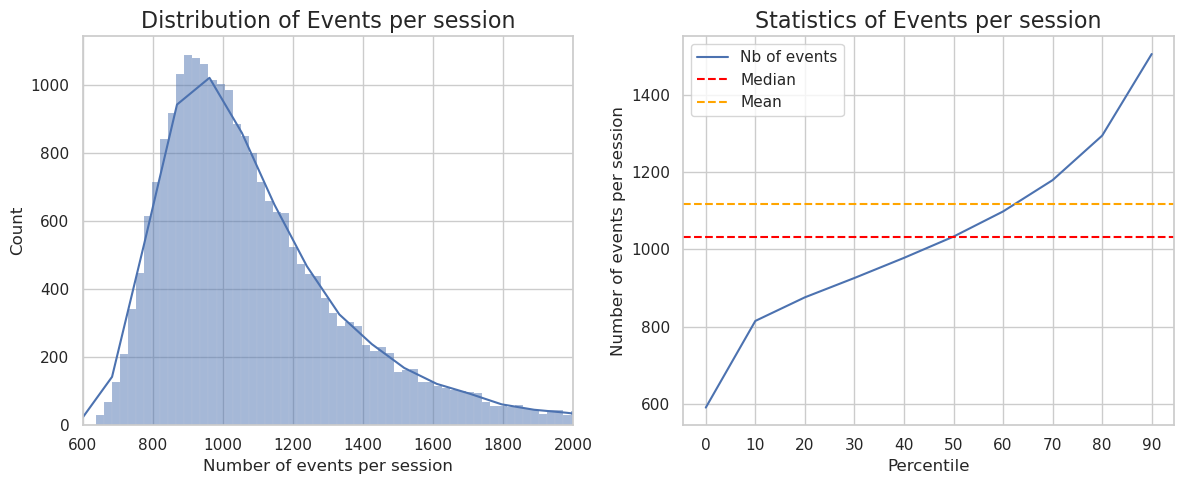

In [17]:
# Count the number of events per session for both the training and test datasets
train_events_per_session = train['session_id'].value_counts()
test_events_per_session = test['session_id'].value_counts()

# Initialize lists to store percentile values for the train and test sets
train_percentiles, test_percentiles = [], []

# Define the range of percentiles to calculate (0th to 90th percentile in steps of 10)
xrange = range(0, 100, 10)
for q in xrange:
    # Calculate the q-th percentile for the number of events per session in the train set
    train_perc = np.percentile(train_events_per_session, q)
    # Calculate the q-th percentile for the number of events per session in the test set
    test_perc = np.percentile(test_events_per_session, q)
    # Append these values to the respective lists
    train_percentiles.append(train_perc)
    test_percentiles.append(test_perc)

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_events_per_session.values, kde=True)
plt.xlabel("Number of events per session", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Events per session", fontsize=16)
plt.xlim(600, 2000)

plt.subplot(1, 2,2)
plt.plot(xrange, train_percentiles)
plt.axhline(train_events_per_session.median(), color='red', ls='--')
plt.axhline(train_events_per_session.mean(), color='orange', ls='--')
plt.xlabel("Percentile", fontsize=12)
plt.ylabel("Number of events per session", fontsize=12)
plt.xticks(xrange)
plt.legend(['Nb of events', 'Median', 'Mean'])
plt.title("Statistics of Events per session", fontsize=16)

plt.tight_layout()
plt.show()

**Comments:**
- A session typically encompasses anywhere between several hundred to a few thousand individual events.
- Both the median and the mean are slightly over 1000. The distribution appears to be normal with a slight positive skew.
- Above the 90th percentile, the values for the number of events are very large so I have had to limit the x-axis.

Next, as noticed by [@pdnartreb](https://www.kaggle.com/pdnartreb) in their [notebook](https://www.kaggle.com/code/pdnartreb/session-id-reverse-engineering), `session_id` likely contains date and time information, however, the significance of the last two digits remains unclear.

I'll convert its type to `str`, extract the 2 target digits, and then transform them into the appropriate `np.uint` data type to optimize memory usage.

In [18]:
def get_session_id_features(data):
    session_ids = pd.DataFrame()
    session_ids['session_id'] = data['session_id'].unique()
    session_ids['year'] = session_ids['session_id'].apply(lambda x: int(str(x)[:2])).astype(np.uint8)
    session_ids['month'] = session_ids['session_id'].apply(lambda x: int(str(x)[2:4]) + 1).astype(np.uint8)
    session_ids['weekday'] = session_ids['session_id'].apply(lambda x: int(str(x)[4:6])).astype(np.uint8)
    session_ids['hour'] = session_ids['session_id'].apply(lambda x: int(str(x)[6:8])).astype(np.uint8)
    session_ids['minute'] = session_ids['session_id'].apply(lambda x: int(str(x)[8:10])).astype(np.uint8)
    session_ids['second'] = session_ids['session_id'].apply(lambda x: int(str(x)[10:12])).astype(np.uint8)
    session_ids['ms'] = session_ids['session_id'].apply(lambda x: int(str(x)[12:15])).astype(np.uint16)
    session_ids['unknown_part'] = session_ids['session_id'].apply(lambda x: int(str(x)[15:17])).astype(np.uint8)
    return session_ids

train_session_ids = get_session_id_features(train)
test_session_ids = get_session_id_features(test)
train_session_ids.head()

session_id  year  month  weekday  hour  minute  second   ms  \
0  20090312431273200    20     10        3    12      43      12  732   
1  20090312433251036    20     10        3    12      43      32  510   
2  20090312455206810    20     10        3    12      45      52   68   
3  20090313091715820    20     10        3    13       9      17  158   
4  20090313571836404    20     10        3    13      57      18  364   

   unknown_part  
0             0  
1            36  
2            10  
3            20  
4             4

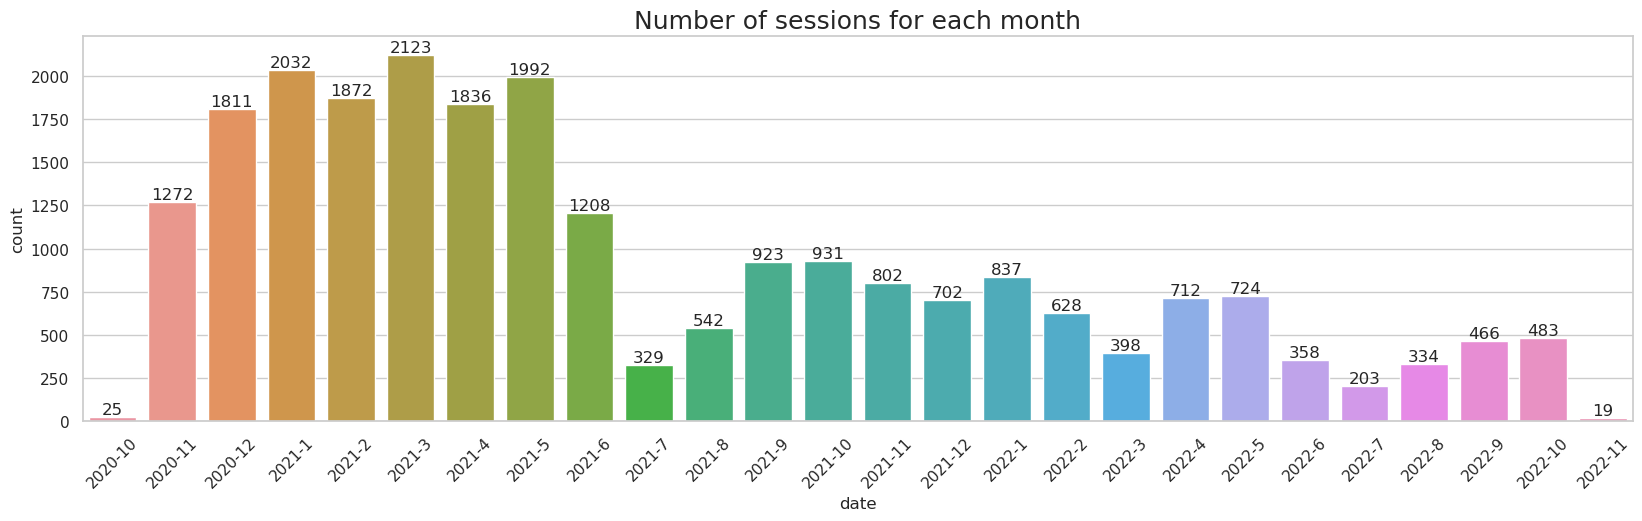

In [19]:
# Create 'date' feature with format Year-Month
train_session_ids['year'] = train_session_ids['year'] + 2000
train_session_ids['date'] = (train_session_ids['year']).astype(str) + '-' + (train_session_ids['month']).astype(str)

# Visualize
plt.figure(figsize=(20, 5))
g = sns.countplot(x='date', data=train_session_ids)
plt.title('Number of sessions for each month', fontsize=18)
g.set_yticklabels(['{}'.format(int(num)) for num in g.get_yticks()])
g.bar_label(g.containers[0])
g.xaxis.set_tick_params(rotation=45)
plt.show()

**Comments:** So, our train data from Oct 2020 to Nov 2022.

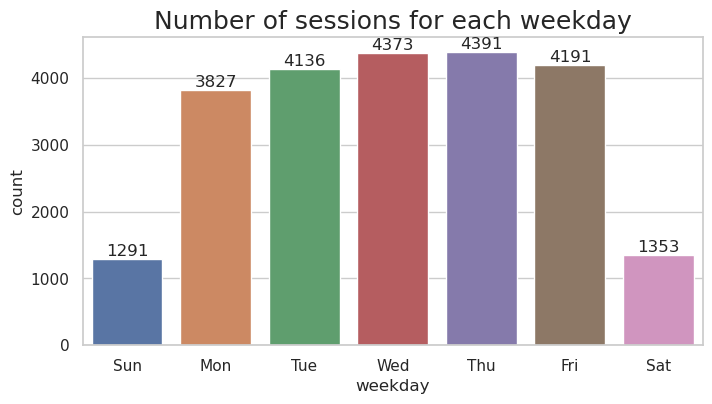

In [20]:
# Map numbers with weekdays to visualize
days_dict = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
train_session_ids['weekday'] = train_session_ids['weekday'].map(days_dict)

# Visualize
plt.figure(figsize=(8, 4))
g = sns.countplot(x='weekday', data=train_session_ids, order = days_dict.values())
plt.title('Number of sessions for each weekday', fontsize=18)
g.set_yticklabels(['{}'.format(int(num)) for num in g.get_yticks()])
g.bar_label(g.containers[0])
g.xaxis.set_tick_params()
plt.show()

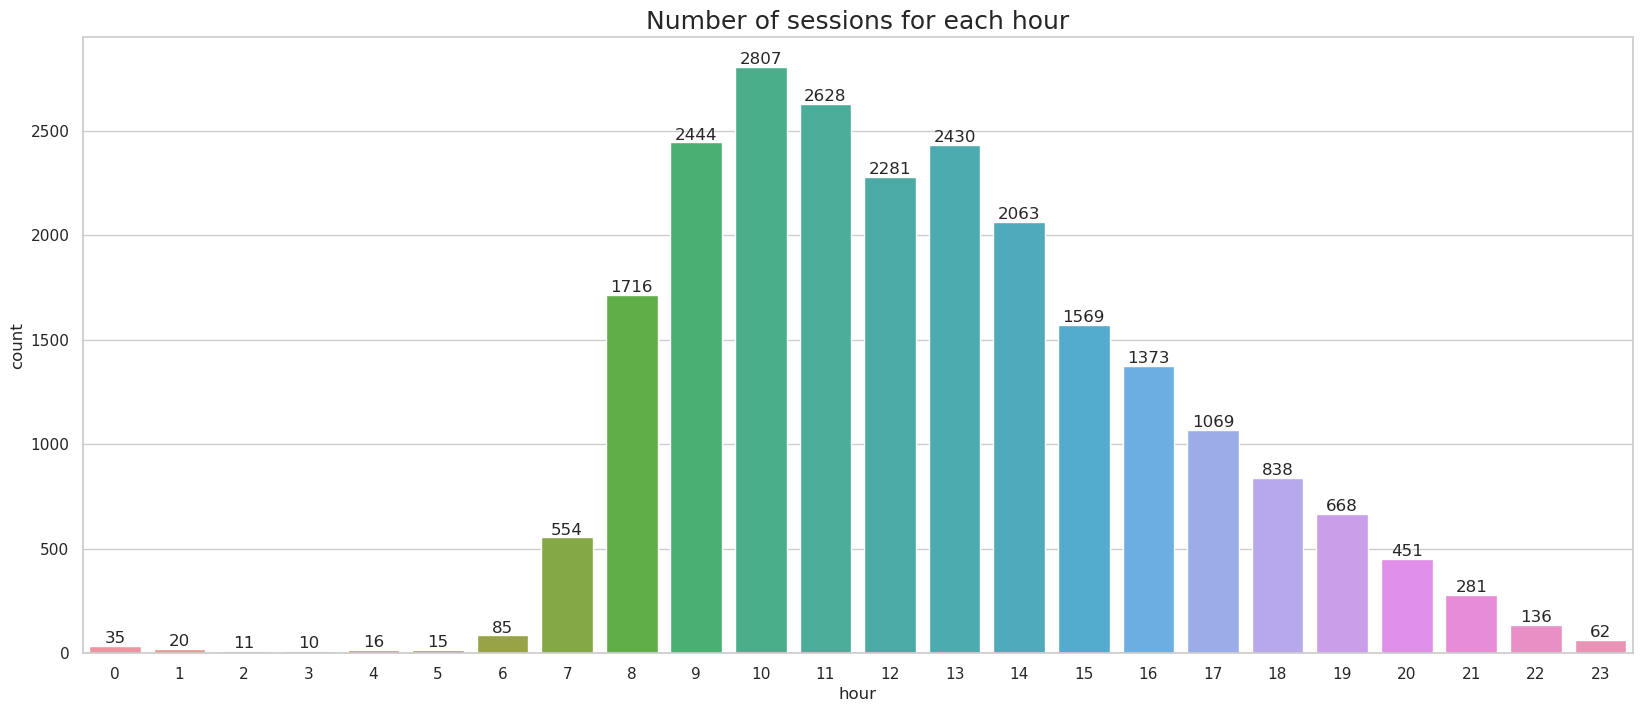

In [21]:
plt.figure(figsize=(20, 8))
g = sns.countplot(x='hour', data=train_session_ids)
plt.title('Number of sessions for each hour', fontsize=18)
g.set_yticklabels(['{}'.format(int(num)) for num in g.get_yticks()])
g.bar_label(g.containers[0])
g.xaxis.set_tick_params()
plt.show()
del train_session_ids, g

**Comments:** Just as expected, the game is mostly played during the school days (Mon to Fri) and working hours ( 8 am. to 18 pm.).

## 2.2 index <a class="anchor" id="index"></a>

`index` is the index of the event for the session. 

In [22]:
idx = train[['session_id', 'index']]
idx_dupl = idx[idx.duplicated()]
print(f"\nNumber of duplicated combinations session_id/index: {len(idx_dupl)}")
print(f"\nNumber of sessions with duplicates: {len(idx_dupl['session_id'].unique())}")
print("\nExamples of sessions with duplicates:", idx_dupl['session_id'].unique()[:4])


Number of duplicated combinations session_id/index: 34534

Number of sessions with duplicates: 142

Examples of sessions with duplicates: ['20110422113670820', '20110507081078290', '20110507133502024', '20110507320323120']
Categories (23562, object): ['20090312431273200', '20090312433251036', '20090312455206810', '20090313091715820', ..., '22100215460321130', '22100217104993650', '22100219442786200', '22100221145014656']


**Comments:** Despite naive expectation, combination of `session_id` and `index` is not unique, there are duplicates.

Here's an example of duplications:

In [23]:
del idx, idx_dupl
train.loc[(train['session_id'] == '20110507081078290') & (train['index'].isin([624, 625]))].sort_values('index')

session_id  index  elapsed_time      event_name       name  \
3160214  20110507081078290    624             0  cutscene_click      basic   
3160963  20110507081078290    624       1213398  navigate_click  undefined   
3160215  20110507081078290    625          1564    person_click      basic   
3160964  20110507081078290    625       1214182  navigate_click  undefined   

         level page  room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  \
3160214      0  NaN  -473.991394    34.685314          320.0          300.0   
3160963     21  NaN  -424.434601   -84.055557          184.0          392.0   
3160215      0  NaN  -473.991394    35.685314          320.0          299.0   
3160964     21  NaN  -580.166931   -72.001373          124.0          383.0   

         hover_duration                           text    fqid  \
3160214             NaN                      undefined   intro   
3160963             NaN                            NaN     NaN   
3160215             NaN  Whatcha doing over there, Jo?  gramps   
3160964             NaN                            NaN     NaN   

                              room_fqid  \
3160214  tunic.historicalsociety.closet   
3160963         tunic.library.frontdesk   
3160215  tunic.historicalsociety.closet   
3160964         tunic.library.frontdesk   

                                                 text_fqid  fullscreen  hq  \
3160214               tunic.historicalsociety.closet.intro           0   0   
3160963                                                NaN           0   0   
3160215  tunic.historicalsociety.closet.gramps.intro_0_...           0   0   
3160964                                                NaN           0   0   

         music level_group  
3160214      1         0-4  
3160963      1       13-22  
3160215      1         0-4  
3160964      1       13-22

In [57]:
sess_with_reversed_index = []
for sess_id, gp in train.groupby("session_id", observed=True):
    if not gp["index"].is_monotonic_increasing: 
        sess_with_reversed_index.append(sess_id)
        
print(f"Number of sessions sessions with reversed index: {len(sess_with_reversed_index)}")

Number of sessions sessions with "reversed index": 258


In [24]:
# Get sessions without index == 0 and count number of sessions like that
non_zero_index = train.groupby('session_id').filter(lambda x: 0 not in x["index"].values)['session_id'].unique()

print(f"Number of sessions without index==0: {len(non_zero_index)}")
print("\nExamples of sessions without index==0:", non_zero_index[:4])

Number session_id without index==0: 92

Examples of sessions without index==0: ['20110422214253730', '20110507404587470', '20110508095691800', '20110508122205864']
Categories (23562, object): ['20090312431273200', '20090312433251036', '20090312455206810', '20090313091715820', ..., '22100215460321130', '22100217104993650', '22100219442786200', '22100221145014656']


**Comments:** Furthermore, some sessions have no `index == 0` (start of the game) or appear "reversed index" phenomenon

The competition host [states](https://www.kaggle.com/competitions/predict-student-performance-from-game-play/discussion/384342#2134312) that all of this might be due to data errors:

> These are both data errors in elapsed_time and index, which may be partly due to timestamps on the server sometimes being inaccurate if a student is clicking or performing other actions very quickly. You can assume that the index gives the correct order of events in cases where the elapsed_time is inconsistent. I'm less sure why the duplicates are occurring, but index == 0 should indicate the start of a session and there should not be duplicate events for a session.

Furthermore, there are some other irregularities in the `index` data, described in [this notebook](https://www.kaggle.com/code/abaojiang/eda-on-game-progress) and summarized in [this discussion](https://www.kaggle.com/competitions/predict-student-performance-from-game-play/discussion/395250). Most or even all of them are present in the hidden test data, used for evaluation.

## 2.3 elapsed_time <a class="anchor" id="elapsed-time"></a>

`elapsed_time`: shows how much time has passed (in milliseconds) between the start of the session and when the event was recorded

Assumpt last `elapsed_time` in a sesson is the time the session finish, we'll see how needed time to finish the game distribute.

(0.0, 180.0)

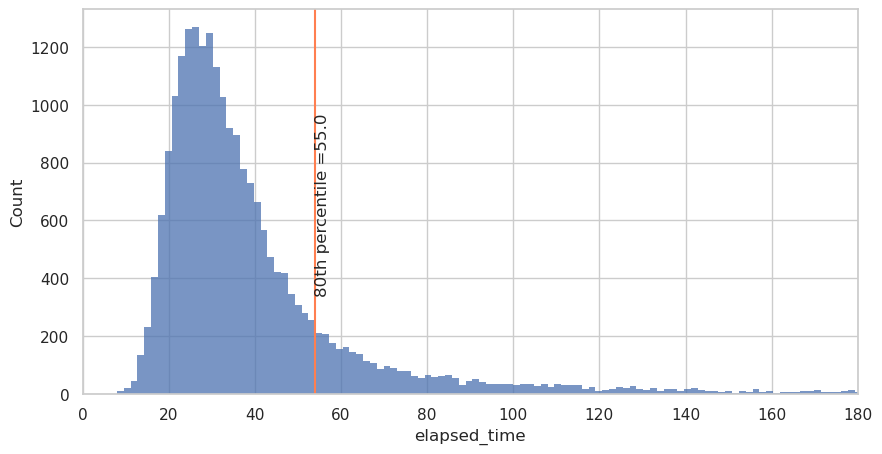

In [25]:
# Calculate the finish time of a session by getting the max elapsed_time, then convert time to minutes
last_time_in_session = train.groupby('session_id')['elapsed_time'].max().astype(np.float64)/60000.0
quant = last_time_in_session.quantile(0.8)

# Visualize
plt.figure(figsize=(10, 5))
g = sns.histplot(last_time_in_session, kde=False)
g.axvline(x=quant-1, color="coral")  # Line for mean
g.text(quant-1, 350, f'80th percentile ={round(quant, 1)}', rotation=90)
plt.xlim(0, 180)

In [26]:
print("The longest session  of the TRAIN SET lasted about",
      int(train['elapsed_time'].max() / 8.64e7), "days.")
print("The longest session of the TEST SET lasted about",
      int(test['elapsed_time'].max() / 1000), "sec.")

The longest session  of the TRAIN SET lasted about 23 days.
The longest session of the TEST SET lasted about 6524 sec.


**Comments:** 80% of session finish before 1 hour. However, there are still some sessions last many days.

In [27]:
# Calculate the difference between consecutive elapsed_time in each session
train['elapsed_time_change'] = (train.groupby('session_id')['elapsed_time'].diff()).astype(np.float32)

print(f"Number of events with negative elapsed time change: {len(train[train['elapsed_time_change'] < 0])}")
print(f"Percent of events with negative elapsed time change: {round(len(train[train['elapsed_time_change'] < 0])/len(train)*100.0, 2)}\n")
print(f"Number of sessions with at least one negative elapsed time change: {len(train.loc[train['elapsed_time_change'] < 0, 'session_id'].unique())}")
print(f"Percent of sessions with at least one negative elapsed time change: {round(len(train.loc[train['elapsed_time_change'] < 0, 'session_id'].unique())*100.0/len(train['session_id'].unique()), 2)}")

Number of events with negative elapsed time change: 654500
Percent of events with negative elapsed time change: 2.49

Number of sessions with at least one negative elapsed time change: 23537
Percent of sessions with at least one negative elapsed time change: 99.89


**Comments:** Same as in `index`, `elapsed_time` also has reversed phenomenon

This bug with negative time change seems to [be present](https://www.kaggle.com/competitions/predict-student-performance-from-game-play/discussion/395686) in the hidden test data, used for evaluation.

## 2.4 event properties: name, type, and id <a class="anchor" id="event-properties"></a>

Let's now look at event properties:
- `event_name` is the event type (e.g. person click, cutscene click, object hover, etc)
- `name` is the event name (e.g. identifies whether a notebook_click is opening or closing the notebook)
- `fqid`: the fully qualified ID of the event (it refers to the person/object the player is interacting with)

Number of unique event names: 11
Number of unique names: 6
Number of unique unique fqid: 128


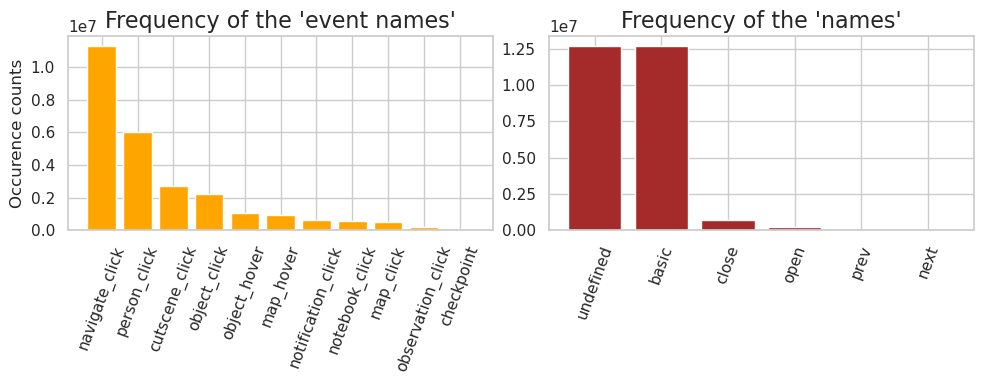

In [28]:
event_names = train['event_name'].value_counts()
names = train['name'].value_counts()
fqid = train['fqid'].value_counts()

print("Number of unique event names:", len(event_names))
print("Number of unique names:", len(names))
print("Number of unique unique fqid:", len(fqid))

# Visualize
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(event_names.index, event_names.values, color='orange')
plt.ylabel("Occurence counts", fontsize=12)
plt.title("Frequency of the 'event names'", fontsize=16)
plt.xticks(rotation=70)

plt.subplot(1, 2, 2)
plt.bar(names.index, names.values, color='brown')
plt.title("Frequency of the 'names'", fontsize=16)
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

**Comments:** The events mainly consist of clicks and occasionally hovers.

Meaning of the `event_name`:
- *navigate_click*: click on the place we want move protagonist (Jo) to move;
- *observation_click*: click on the black object that appears when you take your mouse pointer close to them;
- *notification_click*: after navigate click on an object like the notebook, the retirement letter - the click to hide or to continue after the text appears;
- *object_click*: click anywhere on the object pop up (only after notification_click)
- *object_hover*: the student takes the mouse pointer above an object;
- *map_hover*: the student takes the pointer above any place in the map;
- *map_click*: click on a place on the map to go there;
- *notebook_click*: click on notebook to look for notes made by Jo;
- *checkpoint*: the last event of a level-group/chapter in the data.

For additional details see [this notebook](https://www.kaggle.com/code/shashwatraman/meaning-of-each-event-name-and-eda).

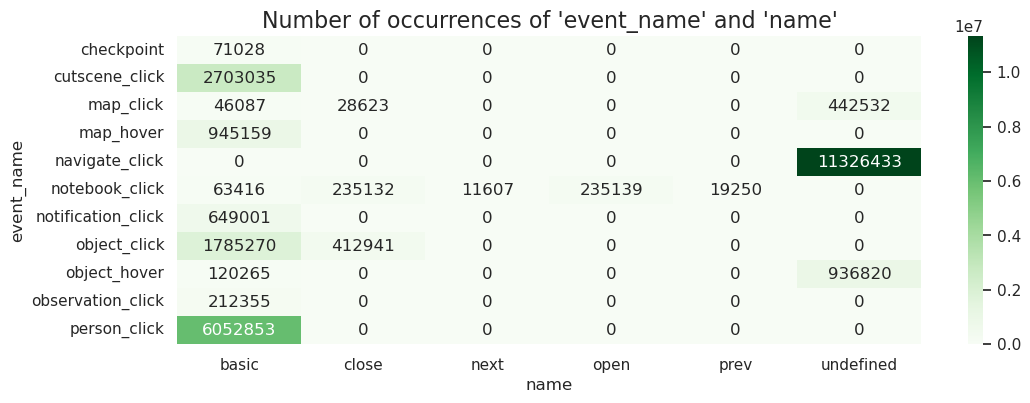

In [29]:
# Create a pivot table, each element is calculated by the 'size' aggregation function counting the occurrences of each combination
pivot_table = train.pivot_table(index='event_name', columns='name', aggfunc='size')
pivot_table = pivot_table.fillna(0).astype(int)

# Visualize
plt.figure(figsize=(12, 4))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Greens')
plt.title("Number of occurrences of 'event_name' and 'name'", fontsize=16)
plt.show()

**Comments:** Certain `names` only occur with specific `event_names`, not all combinations are possible.

Let's have a quick look about `fqid`:

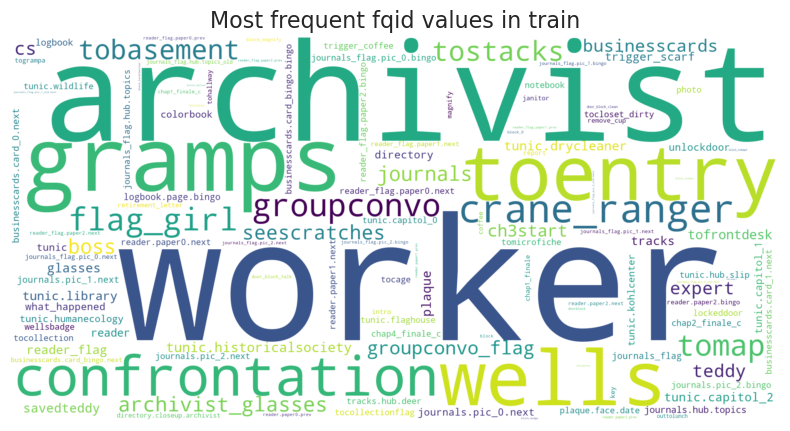

In [58]:
# Create a dictionary mapping 'fqid' values to their frequencies
# fqid.index contains the unique 'fqid' values, and fqid.values contains their counts
word_freq_train = dict(zip(fqid.index.tolist(), fqid.values.tolist()))

# Generate a word cloud using the frequencies from the dictionary
wordcloud_train = WordCloud(width=2000, height=1000, background_color="white").generate_from_frequencies(word_freq_train)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title("Most frequent fqid values in train", fontsize=16)
plt.axis("off")
del word_freq_train, wordcloud_train
plt.show()

## 2.5. game room <a class="anchor" id="game-room"></a>

`room_fqid` is the ID of the room the event took place in. The player progresses through the game by moving from one room to another.

In [31]:
room_counts_train = train['room_fqid'].value_counts()/1000
room_counts_test = test['room_fqid'].value_counts()

print("Number of unique rooms:", len(room_counts_train))

Number of unique rooms: 19


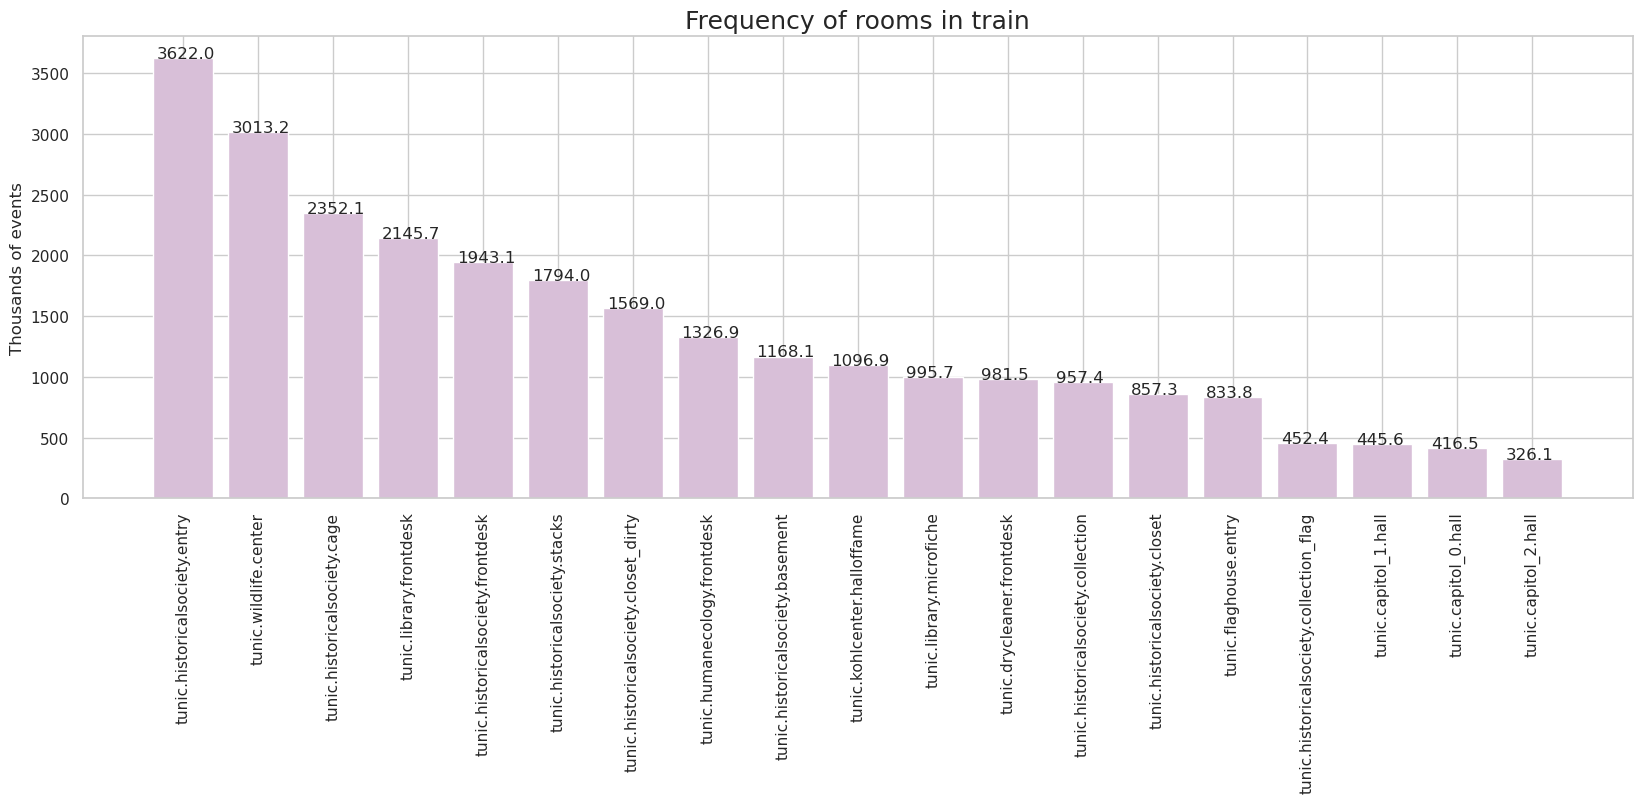

In [32]:
plt.figure(figsize=(20, 6))
plt.bar(room_counts_train.index, room_counts_train.values, color='thistle')
plt.ylabel("Thousands of events", fontsize=12)
plt.title("Frequency of rooms in train", fontsize=18)
for i, v in enumerate(room_counts_train.values):
    plt.text(i-0.35, v, str(round(v, 1)))
plt.xticks(rotation=90)
plt.show()

del i, v
plt.show()

## 2.6 level and level_group <a class="anchor" id="level"></a>

- `level` is what level of the game the event occurred in (0 to 22).
- `level_group`: which group of levels - and group of questions - this row belongs to (0-4, 5-12, 13-22)

The number of questions in each level_group is fixed:

| `level_group` | questions | number of questions|
|:---:|:--:|:--:|
| 0-4 |  q1 to q3 |3|
| 5-12 | q4 to q13 |10|
| 13-22 | q14 to q18 |5|

At levels 4, 12, 22 the game has *checkpoint* events when questions are being asked.

Note that there are sessions in which one of the 22 levels is not present. Most likely this is due to data record issues:

In [33]:
# Get unique pair of 'session_id' and 'level'
unique_levels_per_session = train[['session_id', 'level']].drop_duplicates()
# Count number of unique levels for each session
missing_sessions = unique_levels_per_session.groupby('session_id').count().reset_index(drop=False)
# Filter sessions where number of levels != 23 (find levels are missing)
missing_sessions = missing_sessions[missing_sessions['level'] != 23].reset_index(drop=True)['session_id']
print(f"Number of sessions in which one of the 22 levels is not present: {len(missing_sessions)}")

# Iterate through all levels (0 to 22) to check which levels are missing in each sessions
for lvl in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]:
    x = unique_levels_per_session.loc[(unique_levels_per_session['session_id'].isin(missing_sessions)) & (unique_levels_per_session['level'].eq(lvl))]
    if len(x) != len(missing_sessions):
        print(f"\nLevel {lvl} is missing in {len(x)} sessions")
        print(f"Examples of sessions with missing {lvl} level:", x['session_id'].to_list()[:5])
del lvl, x, unique_levels_per_session, missing_sessions

level_counts_train = train['level'].value_counts()/1000
level_group_counts_train = train['level_group'].value_counts()/1000
level_counts_test = test['level'].value_counts()
level_group_counts_test = test['level_group'].value_counts()

Number of sessions in which one of the 22 levels is not present: 577

Level 7 is missing in 576 sessions
Examples of sessions with missing 7 level: ['20090316190523732', '20100007445515820', '20100014211946468', '20100018421509572', '20100020122406090']

Level 15 is missing in 17 sessions
Examples of sessions with missing 15 level: ['20100020122406090', '20100110093663916', '20100309472366890', '20100512192183730', '20110410570739092']

Level 20 is missing in 561 sessions
Examples of sessions with missing 20 level: ['20090316190523732', '20100007445515820', '20100014211946468', '20100018421509572', '20100115005512812']

Level 21 is missing in 570 sessions
Examples of sessions with missing 21 level: ['20090316190523732', '20100007445515820', '20100014211946468', '20100018421509572', '20100020122406090']


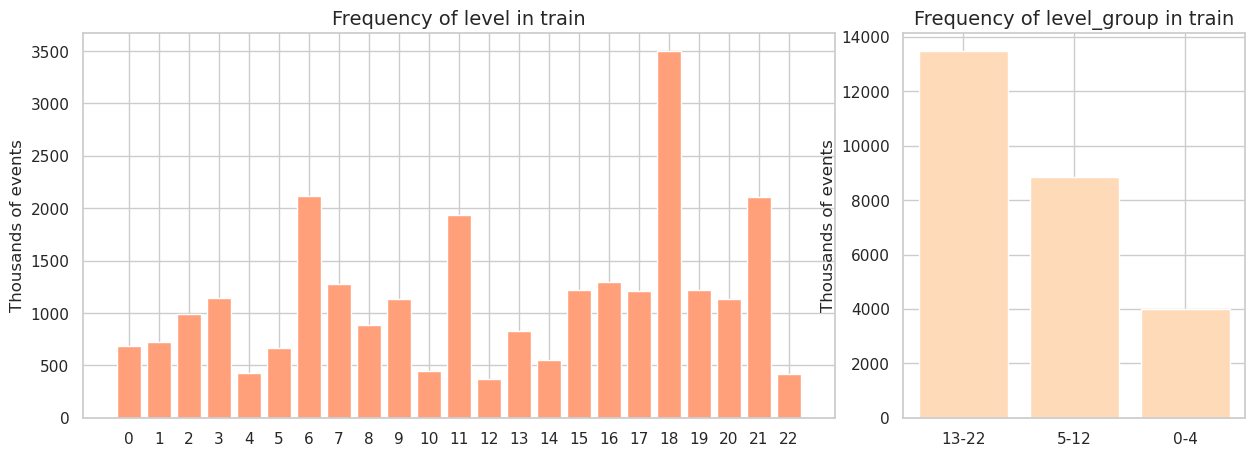

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, (1, 2))
plt.bar(level_counts_train.index, level_counts_train.values, color='lightsalmon')
plt.ylabel("Thousands of events", fontsize=12)
plt.title("Frequency of level in train", fontsize=14)
plt.xticks(level_counts_train.index)

plt.subplot(1, 3, 3)
plt.bar(level_group_counts_train.index, level_group_counts_train.values, color='peachpuff')
plt.ylabel("Thousands of events", fontsize=12)
plt.title("Frequency of level_group in train", fontsize=14)
plt.xticks()
plt.show()

**Comments:** 
- A greater number of events take place during specific periods. For instance, there is a heightened level of event activity observed at level 18.
- This pattern can also be observed in various individual cases as examples. However, each one remains unique.

Let's also look at intersections with some other variables:

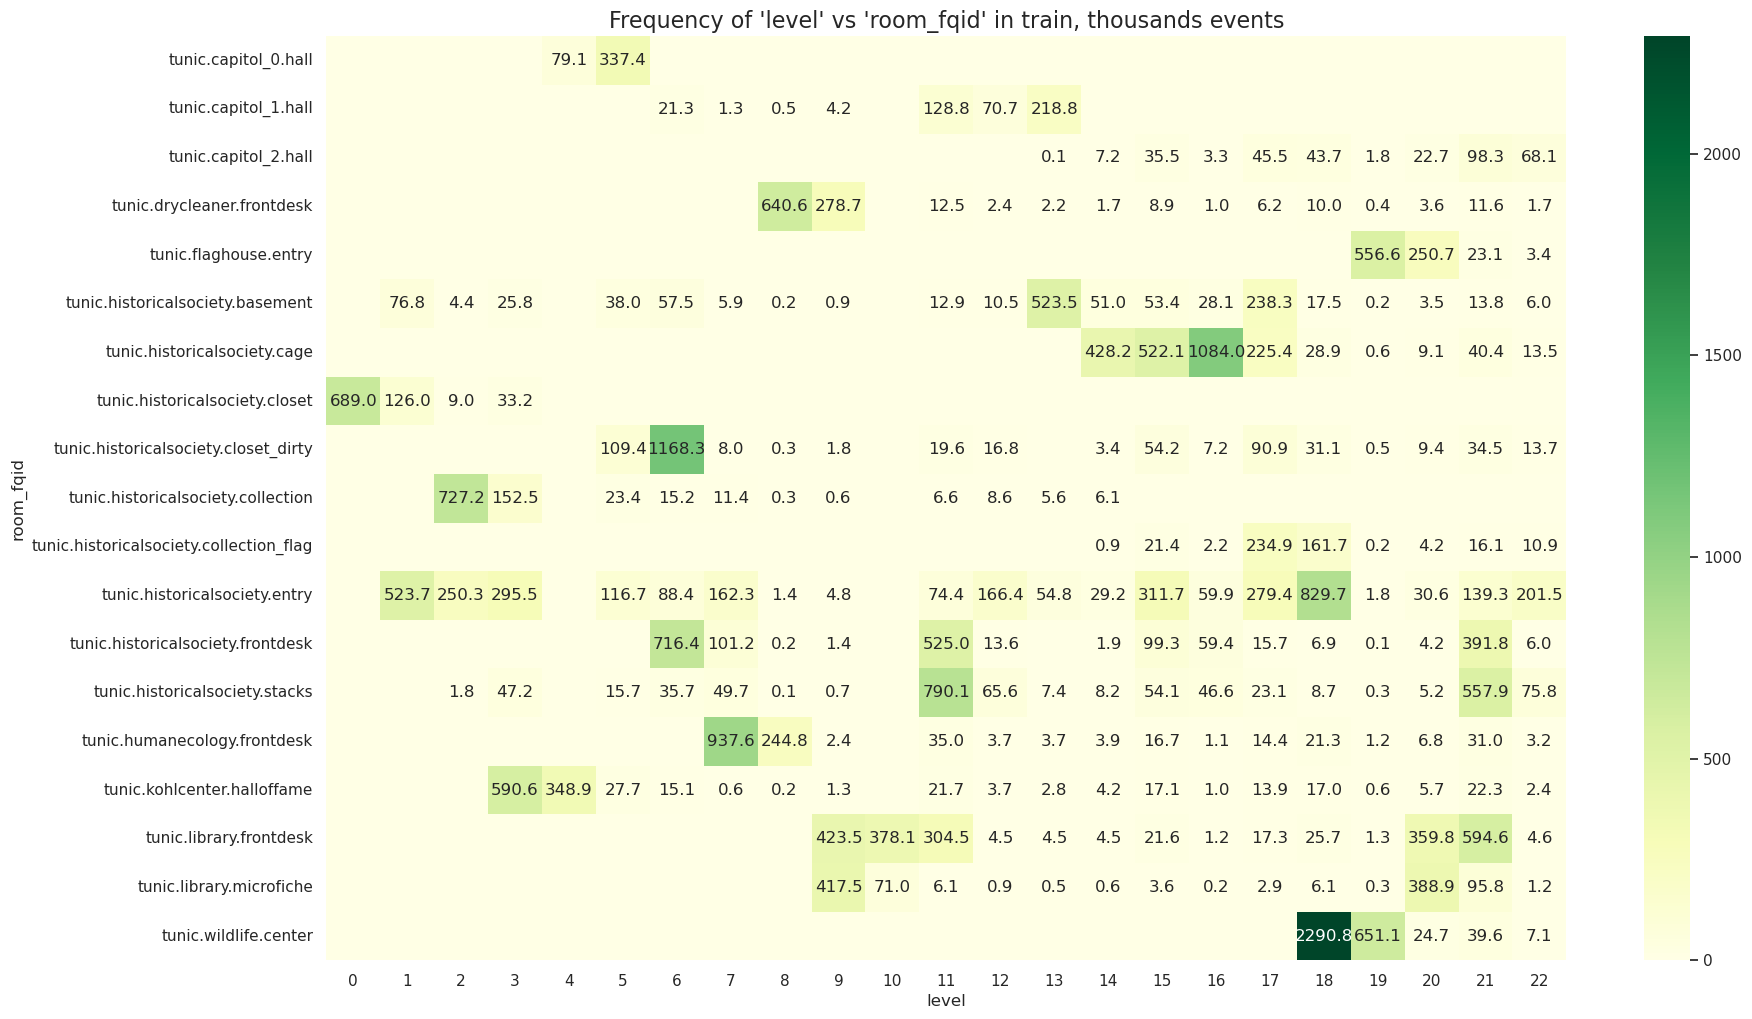

In [35]:
pivot = train.pivot_table(index='room_fqid', columns='level', aggfunc='size')
pivot = (pivot.fillna(0) / 1000).round(decimals = 1)
plt.figure(figsize=(20, 12))
annotations = pivot.astype(str)
annotations[pivot == 0] = ""
g = sns.heatmap(pivot, annot=annotations, fmt='', cmap='YlGn')
plt.title("Frequency of 'level' vs 'room_fqid' in train, thousands events", fontsize=16)
plt.show()

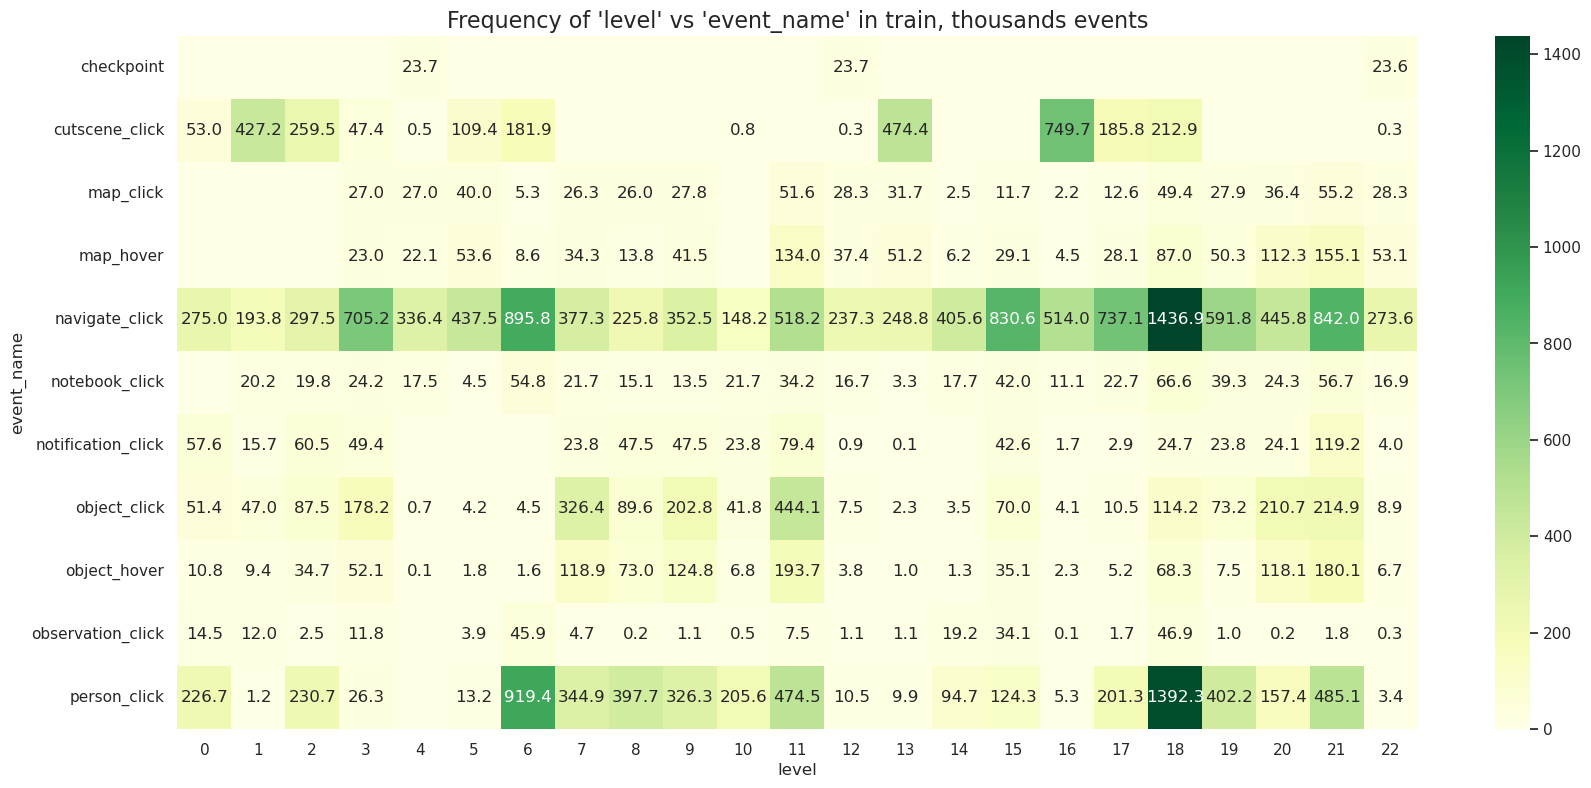

In [36]:
pivot = train.pivot_table(index='event_name', columns='level', aggfunc='size')
pivot = (pivot.fillna(0) / 1000).round(decimals = 1)
plt.figure(figsize=(20, 9))
annotations = pivot.astype(str)
annotations[pivot == 0] = ""
g = sns.heatmap(pivot, annot=annotations, fmt='', cmap='YlGn')
plt.title("Frequency of 'level' vs 'event_name' in train, thousands events", fontsize=16)
plt.show()

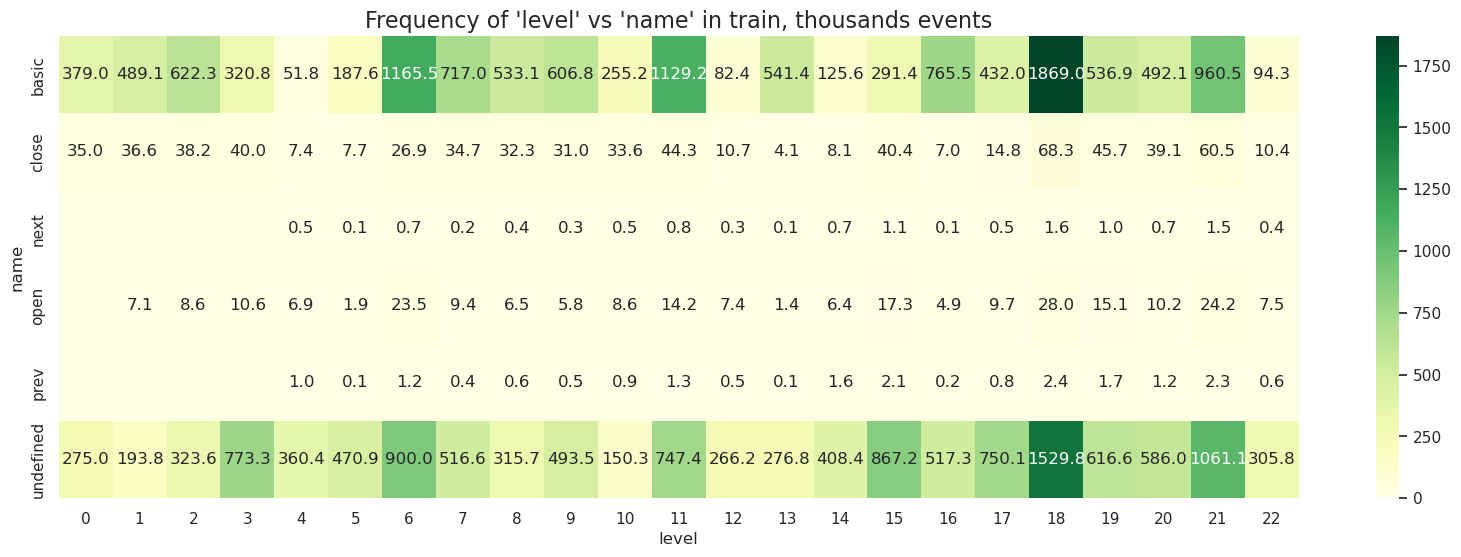

In [37]:
pivot = train.pivot_table(index='name', columns='level', aggfunc='size')
pivot = (pivot.fillna(0) / 1000).round(decimals = 1)
plt.figure(figsize=(20, 6))
annotations = pivot.astype(str)
annotations[pivot == 0] = ""
g = sns.heatmap(pivot, annot=annotations, fmt='', cmap='YlGn')
plt.title("Frequency of 'level' vs 'name' in train, thousands events", fontsize=16)
plt.show()

## 2.7 click geo-location <a class="anchor" id="click-geo-location"></a>

There are four geo-location variables in the data:
- `room_coor_x`: the coordinates of the click in reference to the in-game room (only for click events)
- `room_coor_y`: the coordinates of the click in reference to the in-game room (only for click events)
- `screen_coor_x`: the coordinates of the click in reference to the player’s screen (only for click events)
- `screen_coor_y`: the coordinates of the click in reference to the player’s screen (only for click events)

In [38]:
print(f"Share of events with geo-location in train: {round(train['room_coor_x'].count() / len(train)*100, 2)}")
print(f"Share of events with geo-location in test: {round(test['room_coor_x'].count() / len(test)*100, 2)}")

Share of events with geo-location in train: 92.12
Share of events with geo-location in test: 90.29


**Comments:** About 90-92% of all events are the click events.

Now, let's see the range of geo-location.

In [39]:
stat = pd.DataFrame([train['room_coor_x'].describe().index.to_list(),
                    train['room_coor_x'].astype('float64').describe().values,
                    train['room_coor_y'].astype('float64').describe().values,
                    train['screen_coor_x'].astype('float64').describe().values,
                    train['screen_coor_y'].astype('float64').describe().values]).T
stat.columns = [' ', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y']
stat[stat.columns.to_list()[1:]] = stat[stat.columns.to_list()[1:]].apply(pd.to_numeric, errors='coerce' )
print('Geo-location statistics for events:')
stat[1:].style.hide_index().format(precision=1).background_gradient(cmap='YlGn')

Geo-location statistics for events:


**Comments:** General coordinates statistics make little or no sense. 

I'll visualize the click density of some rooms for more information.
Note that we need to flip the `screen_coor_y` as mentioned in this [discussion](https://www.kaggle.com/competitions/predict-student-performance-from-game-play/discussion/387864).

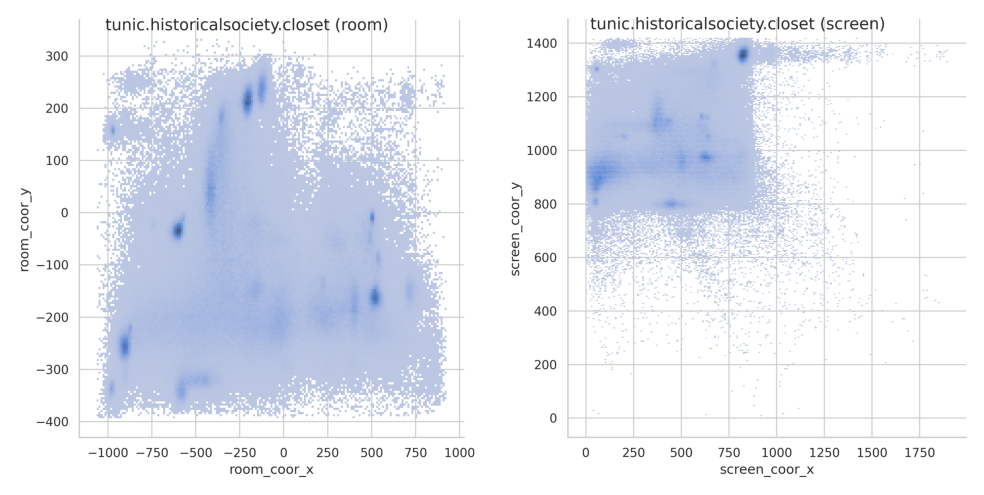

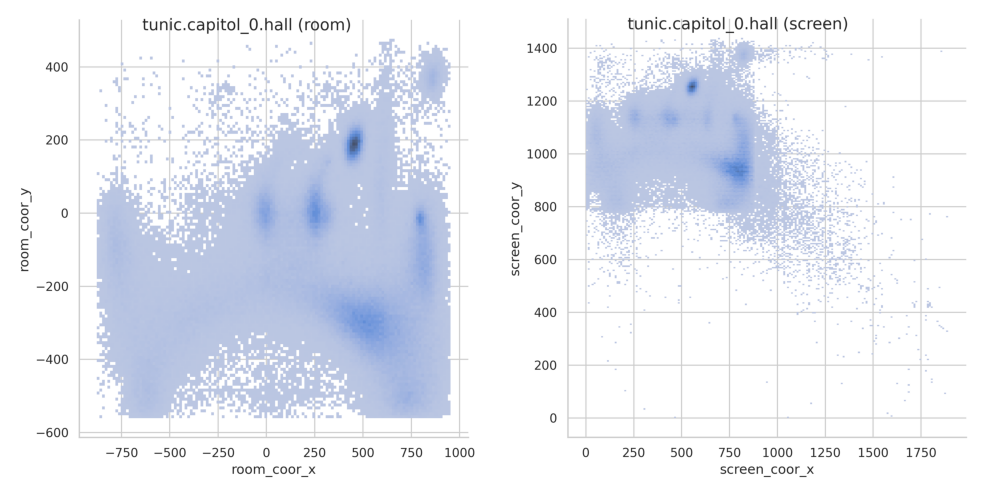

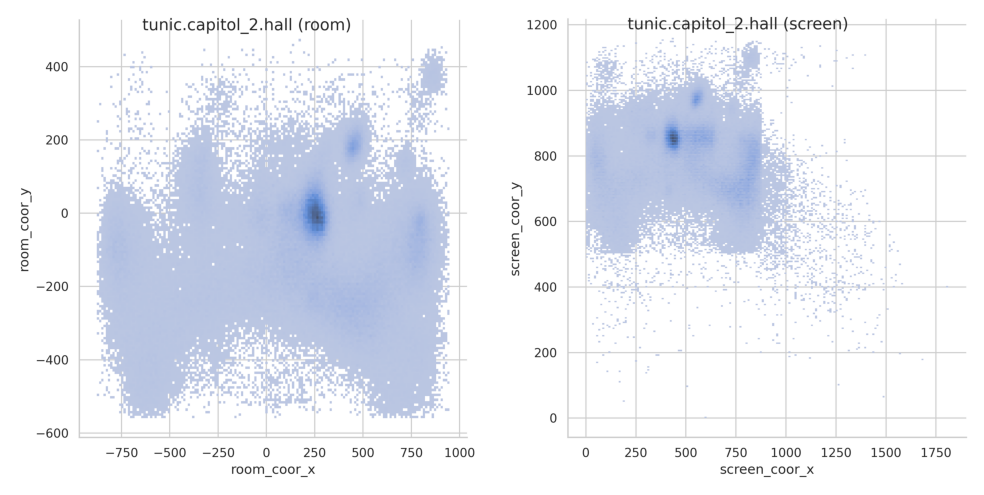

In [40]:
# Get list of rooms
rooms = train['room_fqid'].unique()
# Pick some rooms for visualize
some_rooms = rooms[[0, 6, -1]].to_list()

for room in some_rooms:
    data_room = train[train['room_fqid'] == room]
    # Flip 'screen_coor_y'
    data_room['screen_coor_y'] = data_room['screen_coor_y'].max() - data_room['screen_coor_y'] 
    # Drop nan values and convert to numeric
    data_room = data_room[['room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y']].dropna().reset_index(drop=True)
    data_room = data_room.apply(pd.to_numeric, errors='coerce')

    # Visualize
    g = sns.pairplot(
        data=data_room,
        x_vars=["room_coor_x"],
        y_vars=["room_coor_y"],
        kind='hist',
        height=6
    )
    g.fig.suptitle(f"{room} (room)")
    g.savefig('g0.png', dpi=300)
    plt.close(g.fig)
    
    g = sns.pairplot(
        data=data_room,
        x_vars=["screen_coor_x"],
        y_vars=["screen_coor_y"],
        kind='hist',
        height=6
    )
    g.fig.suptitle(f"{room} (screen)")
    g.savefig('g1.png', dpi=300)
    plt.close(g.fig)
    
    f, ax = plt.subplots(1, 2, figsize=(10, 10))
    ax[0].imshow(mpimg.imread('g0.png'))
    ax[1].imshow(mpimg.imread('g1.png'))
    [axarr.set_axis_off() for axarr in ax.ravel()]
    plt.tight_layout()
    plt.show()

del room, rooms, data_room, g, f, ax

**Comments:** 
- A high density of clicks shows the locations of important objects or characters.
- We can see that the pattern in room and user's screen are quite similar.

Now let's review the geo-location path for a randomly selected session:

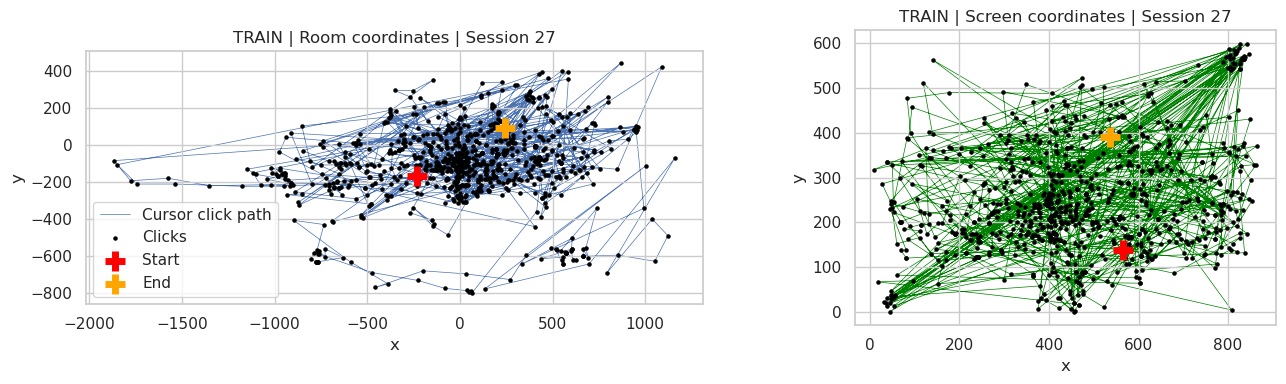

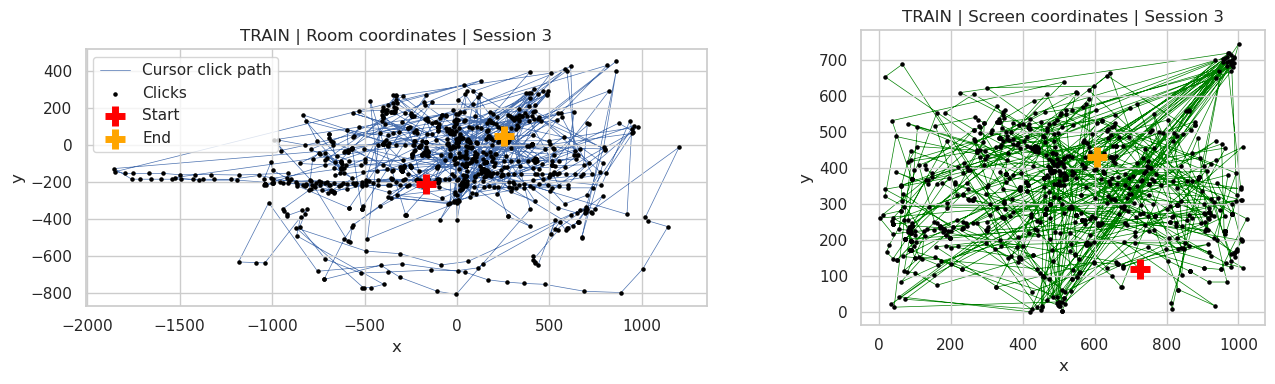

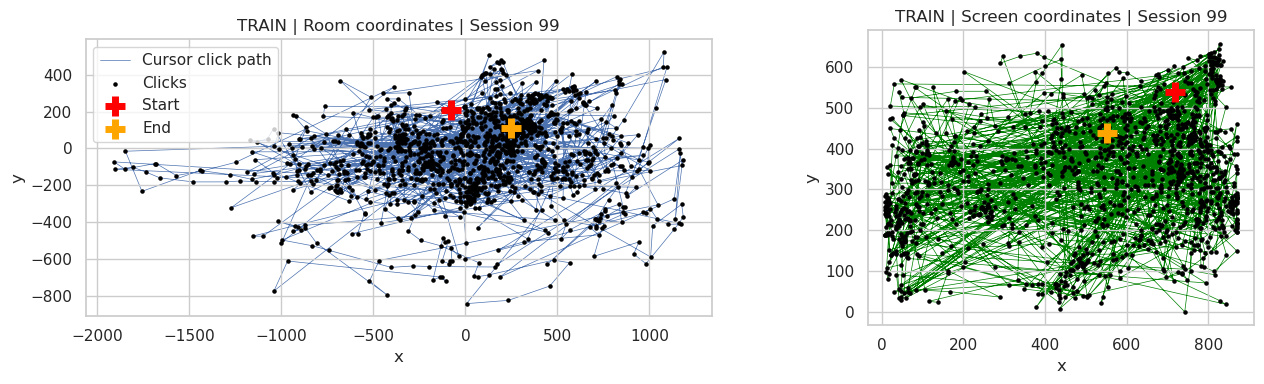

In [41]:
def plot_coordinates(i, set_name):
    # Preprocessing
    df = train if set_name == 'TRAIN' else test
    session_ids = np.array(df['session_id'].unique())
    one_session = df[df['session_id'] == session_ids[i]]
    plt.figure(figsize=(14, 4))
    
    # Room coordinates
    coords = one_session[['room_coor_x', 'room_coor_y']].dropna().reset_index(drop=True)
    x = coords['room_coor_x']
    y = coords['room_coor_y']
    plt.subplot(1, 2, 1)
    plt.plot(x, y, zorder=0, lw=0.5) # line betweens 2 points
    plt.scatter(x, y, s=5, color='black') # all click points
    plt.scatter(x[0], y[0], s=200, lw=5, color='red', marker='+') # start point
    plt.scatter(x[-1:], y[-1:], s=200, lw=5, color='orange', marker='+') # end point
    plt.legend(['Cursor click path', 'Clicks', 'Start', 'End'])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{set_name} | Room coordinates | Session {i}")
    
    # Screen coordinates
    coords = one_session[['screen_coor_x', 'screen_coor_y']].dropna().reset_index(drop=True)
    x = coords['screen_coor_x']
    y = coords['screen_coor_y'].max() - coords['screen_coor_y']
    plt.subplot(1, 2, 2)
    plt.plot(x, y, zorder=0, lw=0.5, color='green') # line betweens 2 points
    plt.scatter(x, y, s=5, color='black') # all click points
    plt.scatter(x[0], y[0], s=200, lw=5, color='red', marker='+') # start point
    plt.scatter(x[-1:], y[-1:], s=200, lw=5, color='orange', marker='+') # end point
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"{set_name} | Screen coordinates | Session {i}")
    
    plt.tight_layout()
    plt.show()

# Plot 3 session examples from the train set
for i in [27, 3, 99]:
    plot_coordinates(i, 'TRAIN')

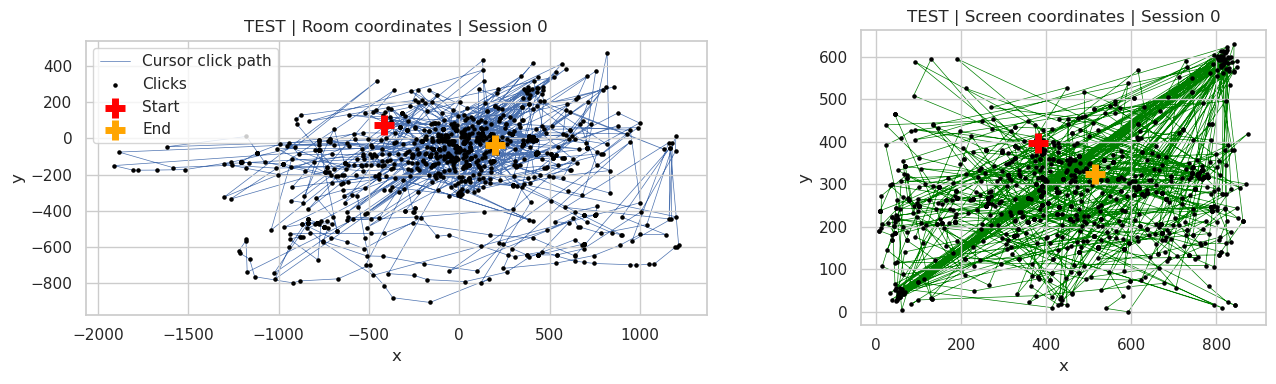

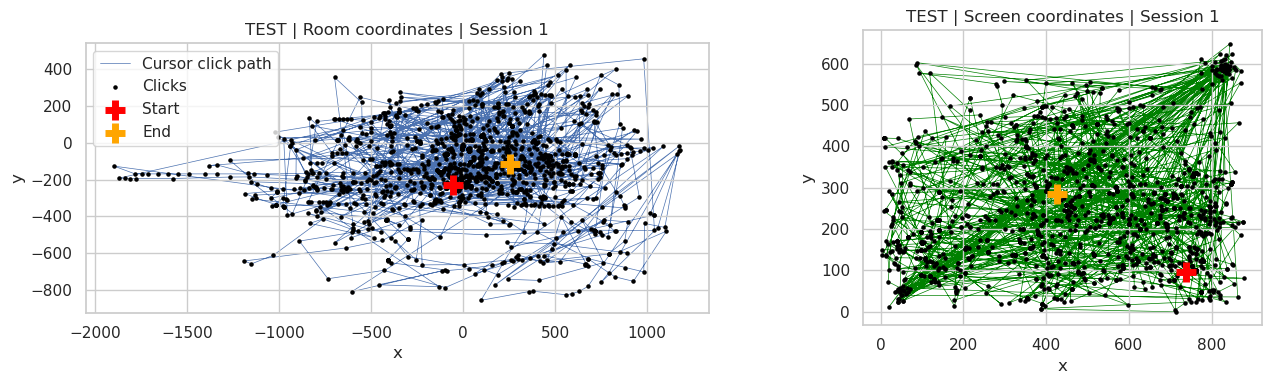

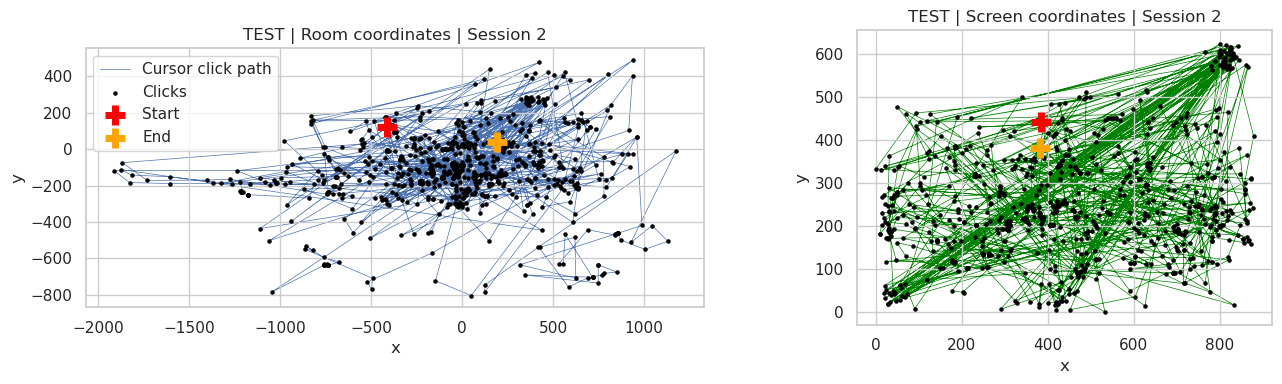

In [42]:
# Plot coordinates of all the sessions of the test set (only 3 sessions)
for i in range(3):
    plot_coordinates(i, 'TEST')

**Comments:** 
- The clicking patterns across various sessions are alike. There are noticeable clusters of clicks in certain regions.
- An analysis of the screen coordinates reveals the presence of at least 3 potential button clusters located at the top-right, bottom-left, and bottom of the screen. The user repeatedly navigated between these clusters, resulting in a concentration of lines in the diagonal direction.
- These coordinates are probably a wealth of information that allows us to track the user's actions, making it valuable information for predictions
- The last click tend to always target to a particular ponit, this is likely the final event.

For additional details on click flow see insightful [discussion](https://www.kaggle.com/competitions/predict-student-performance-from-game-play/discussion/387864) and [notebook](https://www.kaggle.com/code/cdeotte/game-room-click-eda) by Chris Deotte.

In addition, [this notebook](https://www.kaggle.com/code/vassylkorzh/play-game-session?scriptVersionId=119784646) has an interactive view on clicks: it allows you to select a session and watch the session click events at each stage of the game.

## 2.8 text <a class="anchor" id="text"></a>

There are two text variables:
- `text`: the text the player sees during this event
- `text_fqid`: the fully qualified ID of the text

In [43]:
print(f"Number of unique text messages in train: {len(train['text'].unique())}")
print(f"Number of unique text messages in test: {len(test['text'].unique())}")

Number of unique text messages in train: 598
Number of unique text messages in test: 496


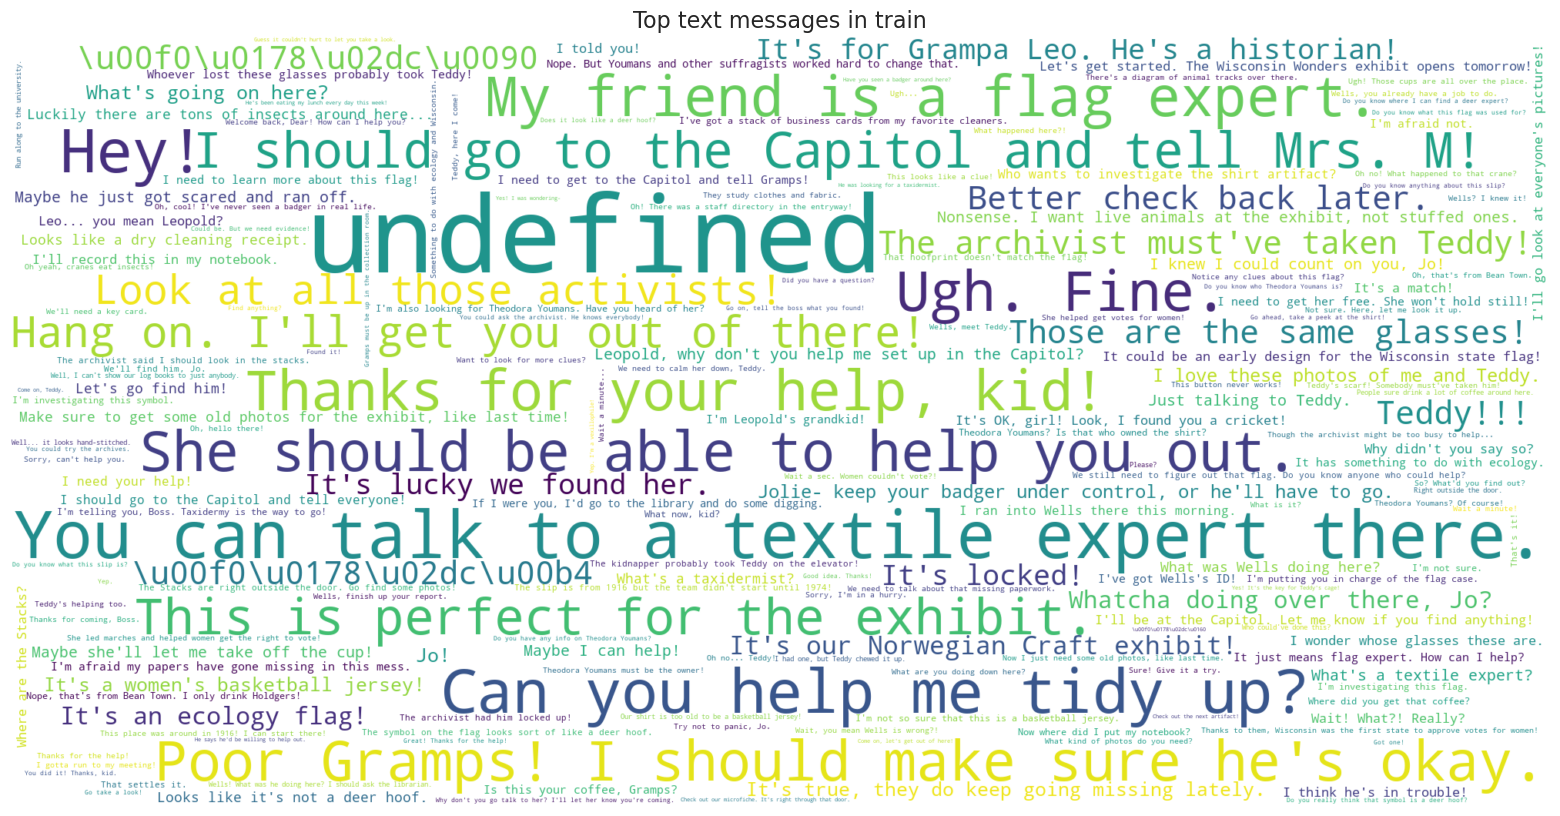

In [44]:
text_counts_train = test['text'].value_counts()
word_freq_train = dict(zip(text_counts_train.index.tolist(), text_counts_train.values.tolist()))
wordcloud_train = WordCloud(width=2000, height=1000, background_color="white").generate_from_frequencies(word_freq_train)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title("Top text messages in train", fontsize=16)
plt.axis("off")
del word_freq_train, wordcloud_train, text_counts_train
plt.show()

In [45]:
print(f"TOP-20 text messages:")
stat = pd.DataFrame([train['text'].value_counts(), test['text'].value_counts()]).T
stat.columns = ['train', 'test']
stat = stat.sort_values('train', ascending=False)
stat.head(20).style.format(precision=0)

TOP-20 text messages:


**Comments:** 
- There are many different phrases from the game and some are more common than others.
- Some text is in ASCII unicode hex format, such as `\u00f0\u0178\u02dc\u0090` corresponds to 😐.
- It may be useful to process these texts in order to generate additional features from them.

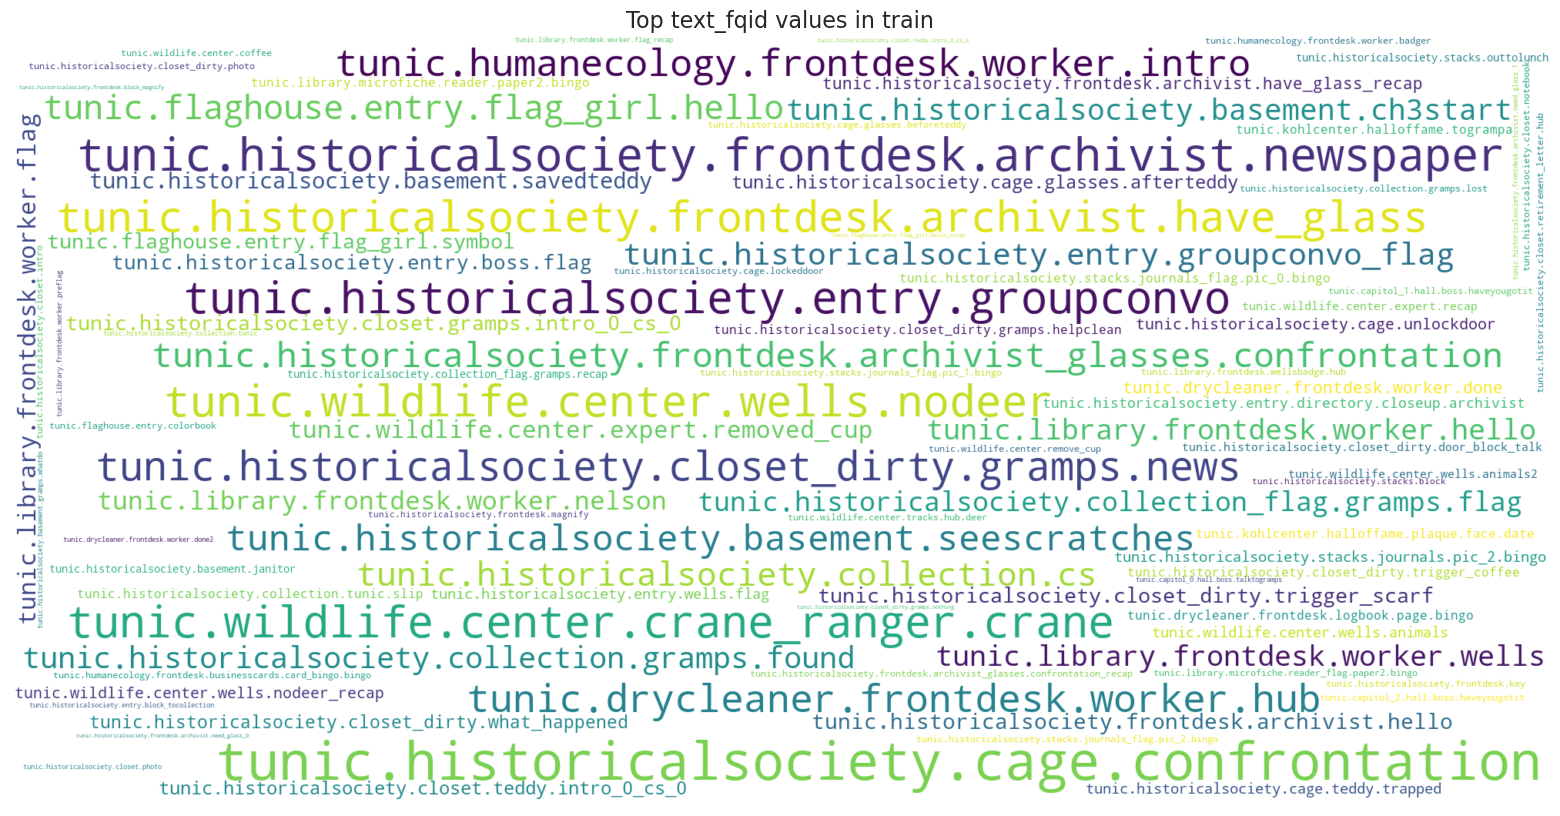

In [46]:
text_counts_train = test['text_fqid'].value_counts()
word_freq_train = dict(zip(text_counts_train.index.tolist(), text_counts_train.values.tolist()))
wordcloud_train = WordCloud(width=2000, height=1000, background_color="white").generate_from_frequencies(word_freq_train)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.title("Top text_fqid values in train", fontsize=16)
plt.axis("off")
del word_freq_train, wordcloud_train, text_counts_train
plt.show()

In [47]:
print(f"TOP-20 text_fqid messages:")
stat = pd.DataFrame([train['text_fqid'].value_counts(), test['text_fqid'].value_counts()]).T
stat.columns = ['train', 'test']
stat = stat.sort_values('train', ascending=False)
stat.head(20).style.format(precision=0)

TOP-20 text_fqid messages:


**Comments:** Note that `text_fqid` and `text` are not the same feature:
- `text_fqid` is the text group;
- `text` is specific text shown to player;
- Furthermore, `text_fqid` includes two elements: `room_fqid` (game room) and `fqid` (person/object the player is interacting with) add additional information about the text itself.

For examples:

In [48]:
train[['room_fqid', 'fqid', 'text_fqid']].dropna().drop_duplicates().head().style.hide_index()

## 2.9 page <a class="anchor" id="page"></a>

`page` is the page number of the event (only for notebook-related events).

In [49]:
print(f"Share of events with page in train: {round(train['page'].count() / len(train)*100, 2)}%")
print(f"Share of events with page in test: {round(test['page'].count() / len(test)*100, 2)}%")

page_counts_train = train['page'].value_counts()/1000
page_counts_test = test['page'].value_counts()

Share of events with page in train: 2.15%
Share of events with page in test: 4.1%


 **Comments:** Share of notebook-related events is small, because it's only for notebook-related events.

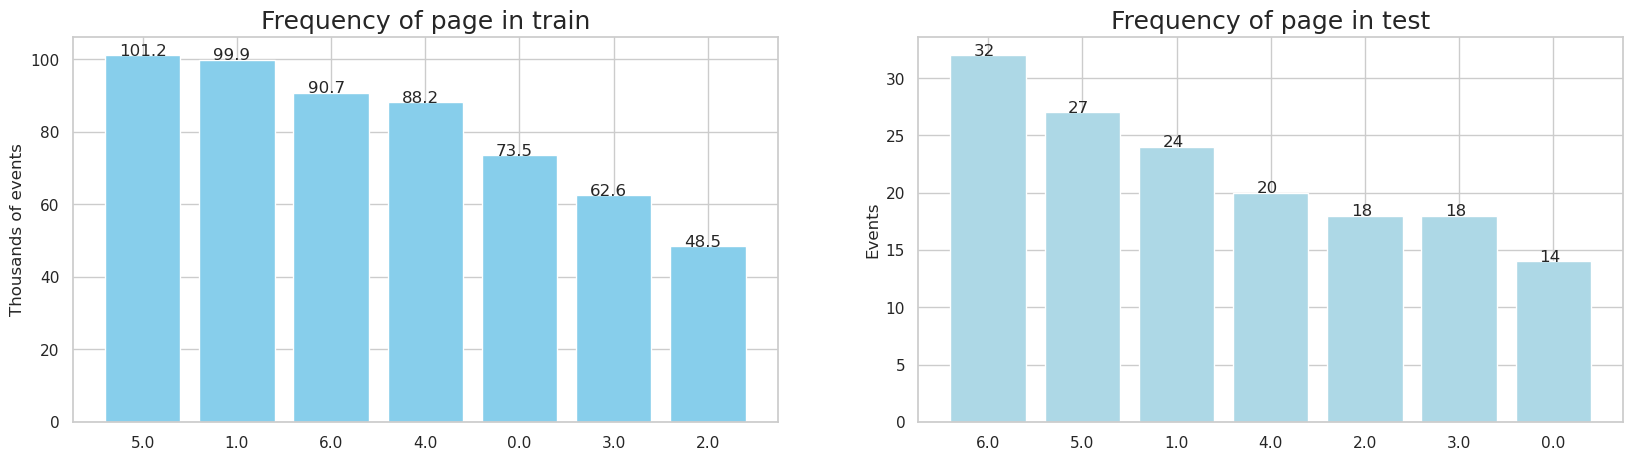

In [50]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.bar(page_counts_train.index, page_counts_train.values, color='skyblue')
plt.ylabel("Thousands of events", fontsize=12)
plt.title("Frequency of page in train", fontsize=18)
for i, v in enumerate(page_counts_train.values):
    plt.text(i-0.25, v, str(round(v, 1)))
plt.xticks()

plt.subplot(1, 2, 2)
plt.bar(page_counts_test.index, page_counts_test.values, color='lightblue')
plt.ylabel("Events", fontsize=12)
plt.title("Frequency of page in test", fontsize=18)
for i, v in enumerate(page_counts_test.values):
    plt.text(i-0.15, v, str(int(v)))
del page_counts_train, page_counts_test
plt.xticks()
plt.show()

## 2.10 hover <a class="anchor" id="hover"></a>

`hover_duration`: how long (in milliseconds) the hover happened for (only for hover events). There are [two types](https://www.kaggle.com/competitions/predict-student-performance-from-game-play/discussion/391043#2162552) of hover events:

>*Object_Hover* - In each chapter of the game, some tasks have to be performed by the student, like clicking the slip on the t-shirt in the 1st Chapter of the game. This slip is an object. If the student takes the mouse pointer above this object, an object_hover is recorded.
The duration for which the pointer stays above this object, is recorded in the `hover_duration`.
If he/she clicks on the object, it's an `object_click`

>*Map_Hover* - In the map, there are many places a student can click to go there. When he/she takes the pointer above any place in the map, a `map_hover` event is recorded.
Just like in object_hover, hover_duration is the duration for which the pointer stays above that place.
And when the student clicks on any place, it's a `map_click`

Share of hover events is small:


In [51]:
print(f"Share of events with hover_duration in train: {round(train['hover_duration'].count() / len(train)*100, 2)}%")
print(f"Share of events with hover_duration in test: {round(test['hover_duration'].count() / len(test)*100, 2)}%")

hover_duration_train = np.round(train[train['hover_duration'].notna()]['hover_duration'].astype(np.int32)/1000.0, 1)
hover_duration_test = np.round(test[test['hover_duration'].notna()]['hover_duration'].astype(np.int32)/1000.0, 1)

Share of events with hover_duration in train: 7.61%
Share of events with hover_duration in test: 9.47%


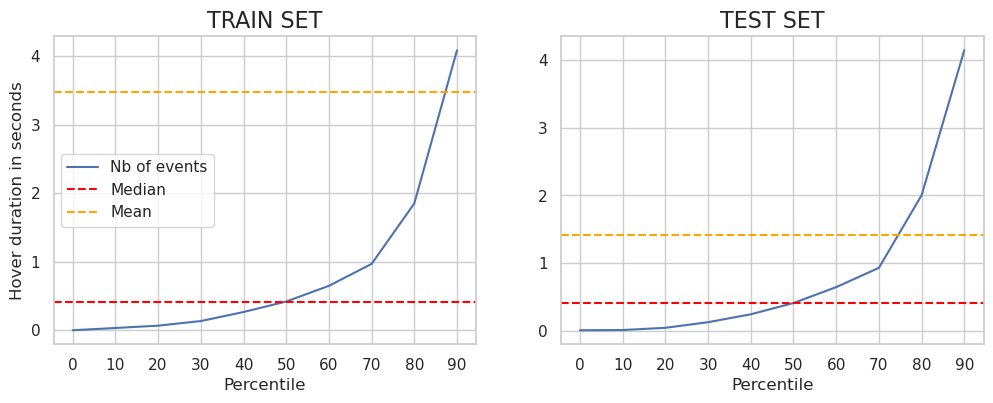

In [52]:
train_hover_durations = train['hover_duration'].dropna() / 1000
test_hover_durations = test['hover_duration'].dropna() / 1000

xrange = range(0, 100, 10)
train_percentiles , test_percentiles = [], []
for q in xrange:
    train_perc = np.percentile(train_hover_durations, q)
    test_perc = np.percentile(test_hover_durations, q)
    train_percentiles.append(train_perc)
    test_percentiles.append(test_perc)
    
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(xrange, train_percentiles)
plt.axhline(train_hover_durations.median(), color='red', ls='--')
plt.axhline(train_hover_durations.mean(), color='orange', ls='--')
plt.xticks(xrange)
plt.yticks(range(0, 5))
plt.legend(['Nb of events', 'Median', 'Mean'])
plt.xlabel("Percentile", fontsize=12)
plt.ylabel("Hover duration in seconds", fontsize=12)
plt.title("TRAIN SET", fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(xrange, test_percentiles)
plt.axhline(test_hover_durations.median(), color='red', ls='--')
plt.axhline(test_hover_durations.mean(), color='orange', ls='--')
plt.xticks(xrange)
plt.xlabel("Percentile", fontsize=12)
plt.title("TEST SET", fontsize=16)

plt.show()

**Comments:** 
- Similar to the page feature, the hover duration is indicated only for a few rows during an hover event. Typically, the duration lasts anywhere from a few milliseconds to a few seconds, with rare instances lasting more than 4 seconds.
- In the training set, we can observe that the mean is significantly higher than the median, which is due to the presence of outliers where the user remained on hover for an extended period. This type of examples should be avoided.

## 2.11 game properties: fullscreen, hq, and music <a class="anchor" id="game-properties"></a>

Finally, we also have game properties:
- `fullscreen` - whether the player is in fullscreen mode
- `hq` - whether the game is in high-quality
- `music` - whether the game music is on or off

We can assume that `0` in each of these columns corresponds to No, and `1` to Yes.

All of them were missing in the original train set, but appeared after [the data update](https://www.kaggle.com/competitions/predict-student-performance-from-game-play/discussion/396202).

In [53]:
print(f"Percent of sessions where fullscreen is the same for all events: {train.groupby('session_id')['fullscreen'].nunique().eq(1).sum()/train['session_id'].nunique()*100}%")
print(f"Percent of sessions where hq is the same for all events: {train.groupby('session_id')['hq'].nunique().eq(1).sum()/train['session_id'].nunique()*100}%")
print(f"Percent of sessions where music is the same for all events: {train.groupby('session_id')['music'].nunique().eq(1).sum()/train['session_id'].nunique()*100}%")

Percent of sessions where fullscreen is the same for all events: 100.0%
Percent of sessions where hq is the same for all events: 100.0%
Percent of sessions where music is the same for all events: 100.0%


**Comments:** It looks like game properties are the same from beginning to an end of a session.

So, it makes more sense to look at frequency per session:

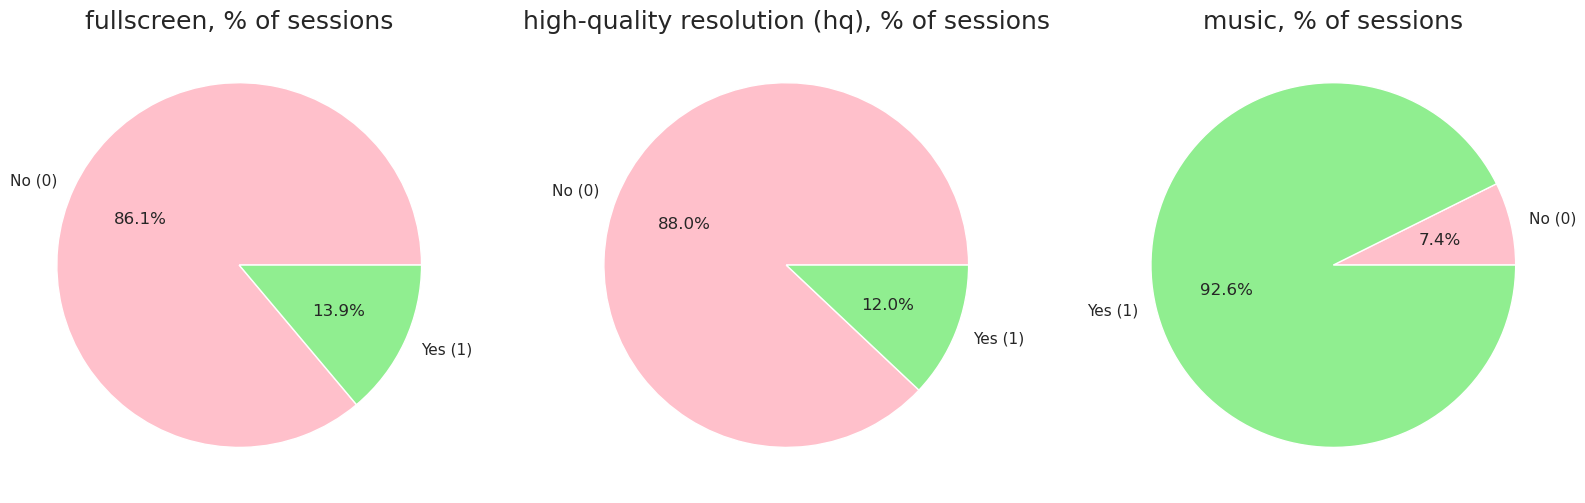

In [54]:
gc.collect()
plt.figure(figsize=(20, 14))
plt.subplot(1, 3, 1)
plt.pie(train.groupby('session_id')['fullscreen'].median().value_counts().sort_index(), 
        labels = ['No (0)', 'Yes (1)'], colors = ['pink', 'lightgreen'], autopct='%.1f%%')
plt.title('fullscreen, % of sessions', fontsize=18)

plt.subplot(1, 3, 2)
plt.pie(train.groupby('session_id')['hq'].median().value_counts().sort_index(), 
        labels = ['No (0)', 'Yes (1)'], colors = ['pink', 'lightgreen'], autopct='%.1f%%')
plt.title('high-quality resolution (hq), % of sessions', fontsize=18)

plt.subplot(1, 3, 3)
plt.pie(train.groupby('session_id')['music'].median().value_counts().sort_index(), 
        labels = ['No (0)', 'Yes (1)'], colors = ['pink', 'lightgreen'], autopct='%.1f%%')
plt.title('music, % of sessions', fontsize=18)
plt.show()

# 3. References <a class="anchor" id="reference"></a>

| No. | Keywords | URL |
|:---:|:--------|:---|
| [1](#content1) <a name="ref1"></a> | Paul Bacher's notebook|https://www.kaggle.com/code/paulbacher/detailed-eda-student-perf-from-game-play|
| [2](#content2) <a name="ref2"></a> | Demid Chernenko's notebook |https://www.kaggle.com/code/demche/student-performance-from-game-play-eda|
| [3](#content3) <a name="ref3"></a> | Competition's Discussions |https://www.kaggle.com/competitions/predict-student-performance-from-game-play/discussion|
